In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.tanh((lo_z, hi_z))
    return r, p, lo, hi

In [4]:
fc_values = pd.read_csv('/external/rprshnas01/kcni/mabdelhack/uk_biobank/tfmri/imaging/functional_connectivity_25/ica_d25_full.csv', header=None)
fc_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40699 entries, 0 to 40698
Columns: 210 entries, 0 to 209
dtypes: float64(210)
memory usage: 65.2 MB


In [5]:
fc_values.isna().sum()

0      2857
1      2857
2      2857
3      2857
4      2857
       ... 
205    2857
206    2857
207    2857
208    2857
209    2857
Length: 210, dtype: int64

In [6]:
n_std = 2
for col in fc_values.columns:
    mean = fc_values[col].mean()
    sd = fc_values[col].std()

    fc_values.loc[(fc_values[col] > mean+(n_std*sd)), col] = np.nan

In [7]:
fc_values.isna().sum()

0      3802
1      3970
2      3893
3      3934
4      3858
       ... 
205    3805
206    3685
207    3980
208    3819
209    3823
Length: 210, dtype: int64

In [8]:
subject_list = pd.read_csv('/external/rprshnas01/kcni/mabdelhack/uk_biobank/tfmri/imaging/functional_connectivity_25/cognitive_ordered.csv')
subject_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40699 entries, 0 to 40698
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Var1        40699 non-null  int64  
 1   eid         40699 non-null  int64  
 2   x399_2_1    38099 non-null  float64
 3   x399_2_2    38099 non-null  float64
 4   x399_2_3    26619 non-null  float64
 5   x4282_2_0   27449 non-null  float64
 6   x6348_2_0   26675 non-null  float64
 7   x6349_2_0   26675 non-null  float64
 8   x6350_2_0   26675 non-null  float64
 9   x6351_2_0   26675 non-null  float64
 10  x6373_2_0   26391 non-null  float64
 11  x20016_2_0  37376 non-null  float64
 12  x20023_2_0  37894 non-null  float64
 13  x20116_2_0  40429 non-null  float64
 14  x20117_2_0  40429 non-null  float64
 15  x20126_0_0  10111 non-null  float64
 16  x20127_0_0  34294 non-null  float64
 17  x20191_0_0  21592 non-null  float64
 18  x20197_2_0  26675 non-null  float64
 19  x21004_2_0  26170 non-nul

In [9]:
fc_values['eid'] = subject_list['eid'].values.astype(int)

In [10]:
fc_values.set_index('eid', inplace=True)

In [11]:
with open('valid_subjects_fmri_220726.txt', 'r') as f:
    subj_list = f.readlines()
subj_list = [int(s.strip()) for s in subj_list]
len(subj_list)

30945

In [12]:
fc_values = fc_values.loc[subj_list]
fc_values.shape

(30945, 210)

In [13]:
ukb_tabular = pd.read_csv('/external/rprshnas01/kcni/mabdelhack/ml_tester/data/ukbiobank_sleep_variables_20220526_0910/data.csv', index_col='eid')
ukb_tabular.loc[ukb_tabular['Frequency of depressed mood in last 2 weeks']==0.0, 'Frequency of depressed mood in last 2 weeks'] = np.nan
ukb_tabular.loc[ukb_tabular['Frequency of depressed mood in last 2 weeks']==1.0, 'Frequency of depressed mood in last 2 weeks'] = np.nan
ukb_tabular.loc[ukb_tabular['Frequency of unenthusiasm / disinterest in last 2 weeks']==0.0, 'Frequency of unenthusiasm / disinterest in last 2 weeks'] = np.nan
ukb_tabular.loc[ukb_tabular['Frequency of unenthusiasm / disinterest in last 2 weeks']==1.0, 'Frequency of unenthusiasm / disinterest in last 2 weeks'] = np.nan
ukb_tabular.loc[ukb_tabular['Sleeplessness / insomnia']==0.0, 'Sleeplessness / insomnia'] = np.nan
ukb_tabular.loc[ukb_tabular['Daytime dozing / sleeping (narcolepsy)']==0.0, 'Daytime dozing / sleeping (narcolepsy)'] = np.nan
ukb_tabular.loc[ukb_tabular['Daytime dozing / sleeping (narcolepsy)']==1.0, 'Daytime dozing / sleeping (narcolepsy)'] = np.nan
ukb_tabular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41169 entries, 1000177 to 6024843
Data columns (total 68 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Year of birth                                                          41169 non-null  float64
 1   Sex                                                                    41169 non-null  object 
 2   Summed MET minutes per week for all activity                           35061 non-null  float64
 3   Mean time to correctly identify matches                                38394 non-null  float64
 4   Maximum digits remembered correctly                                    28237 non-null  float64
 5   Fluid intelligence score                                               37908 non-null  float64
 6   Time to answer                                                         38612 n

In [14]:
tabular_tfmri = pd.merge(ukb_tabular, fc_values, how='inner', left_index=True, right_index=True)
tabular_tfmri.shape

(30862, 278)

In [15]:
tabular_tfmri.columns

Index([                               'Year of birth',
                                                'Sex',
       'Summed MET minutes per week for all activity',
            'Mean time to correctly identify matches',
                'Maximum digits remembered correctly',
                           'Fluid intelligence score',
                                     'Time to answer',
             'Duration to complete alphanumeric path',
          'Total errors traversing alphanumeric path',
                 'Number of puzzles correctly solved',
       ...
                                                  200,
                                                  201,
                                                  202,
                                                  203,
                                                  204,
                                                  205,
                                                  206,
                                                  207,

<AxesSubplot:>

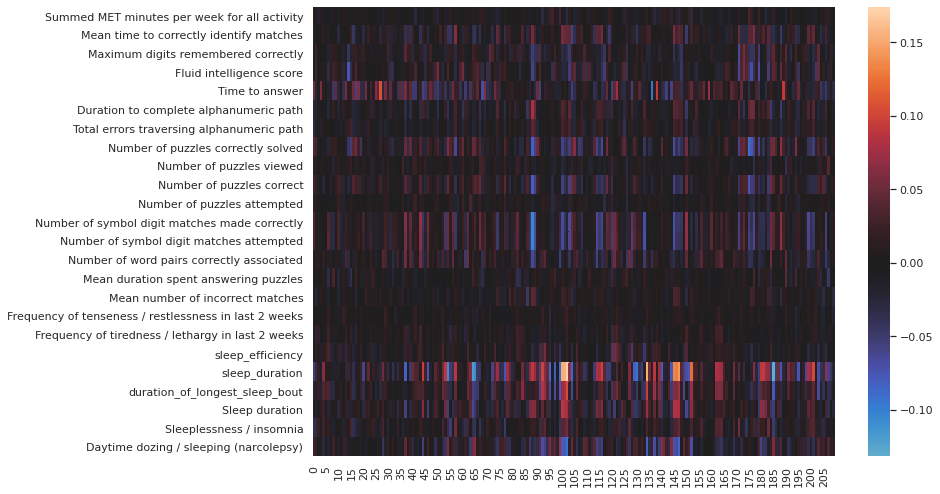

In [15]:
functional_connectivity_variables = np.arange(210)
tabular_columns_corr = ['Summed MET minutes per week for all activity',
                       'Mean time to correctly identify matches',
                        'Maximum digits remembered correctly',
                        'Fluid intelligence score',
                        'Time to answer',
                        'Duration to complete alphanumeric path',
                        'Total errors traversing alphanumeric path',
                        'Number of puzzles correctly solved',
                        'Number of puzzles viewed',
                        'Number of puzzles correct',
                        'Number of puzzles attempted',
                        'Number of symbol digit matches made correctly',
                        'Number of symbol digit matches attempted',
                        'Number of word pairs correctly associated',
                        'Mean duration spent answering puzzles',
                        'Mean number of incorrect matches',
                        'Frequency of tenseness / restlessness in last 2 weeks',
                        'Frequency of tiredness / lethargy in last 2 weeks',
                        'sleep_efficiency',
                        'sleep_duration',
                        'duration_of_longest_sleep_bout',
                       'Sleep duration',
                        'Sleeplessness / insomnia',
                        'Daytime dozing / sleeping (narcolepsy)']
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tabular_tfmri.corr().loc[tabular_columns_corr, functional_connectivity_variables], center=0 )

<AxesSubplot:>

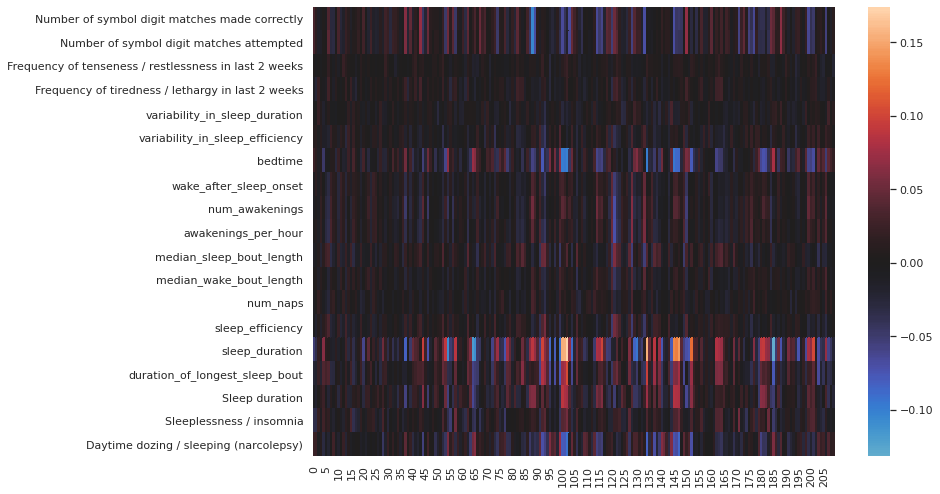

In [16]:
functional_connectivity_variables = np.arange(210)
tabular_columns_corr = [
                        'Number of symbol digit matches made correctly',
                        'Number of symbol digit matches attempted',
                        'Frequency of tenseness / restlessness in last 2 weeks',
                        'Frequency of tiredness / lethargy in last 2 weeks',
                        'variability_in_sleep_duration',
                        'variability_in_sleep_efficiency',
                        'bedtime',
                        'wake_after_sleep_onset',
                        'num_awakenings' ,
                        'awakenings_per_hour', 
                        'median_sleep_bout_length',
                        'median_wake_bout_length',
                        'num_naps',
                        'sleep_efficiency',
                        'sleep_duration',
                        'duration_of_longest_sleep_bout',
                       'Sleep duration',
                        'Sleeplessness / insomnia',
                        'Daytime dozing / sleeping (narcolepsy)']
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(tabular_tfmri.corr().loc[tabular_columns_corr, functional_connectivity_variables], center=0 )

23.36715370242096


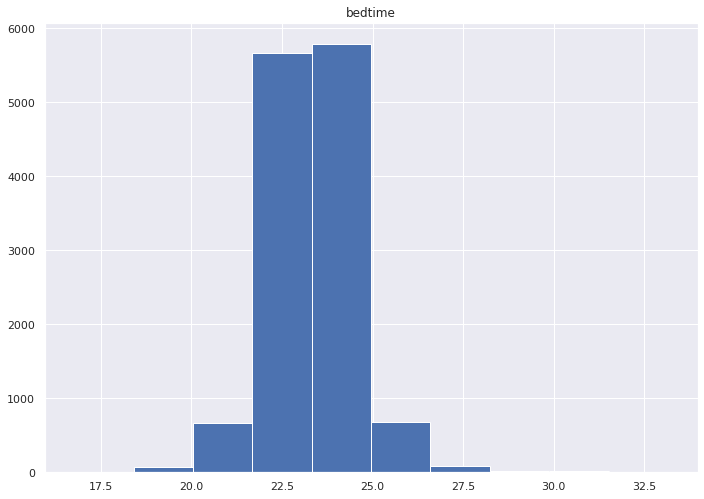

In [26]:
tabular_tfmri.hist(column='bedtime')
print(tabular_tfmri['bedtime'].mean())

<AxesSubplot:>

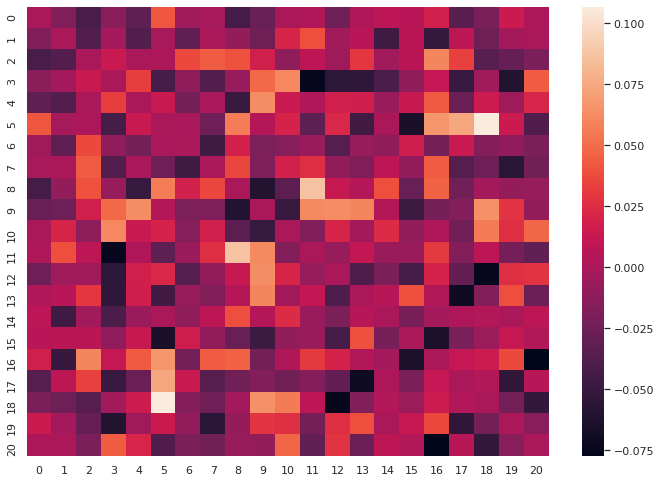

In [18]:
# reverse connectivity plot shape
square_net = np.zeros((21,21))
square_net[np.triu(np.ones((21,21)),1)>0] = tabular_tfmri.corr().loc['duration_of_longest_sleep_bout', functional_connectivity_variables]
square_net = square_net + square_net.T
sns.heatmap(square_net)

In [16]:
ica2yeo7 = pd.read_csv('/external/rprshnas01/kcni/mabdelhack/uk_biobank/tfmri/imaging/functional_connectivity_25/ica2yeo7.csv')
ica2yeo7.info()
ica2yeo7['ICA_d25_ID'] = ica2yeo7['ICA_d25_ID'] - 1
ica2yeo7.sort_values(by='yeo7n_short', inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ICA_d25_ID   21 non-null     int64  
 1   VIS          21 non-null     float64
 2   MOT          21 non-null     float64
 3   DAN          21 non-null     float64
 4   VAN          21 non-null     float64
 5   LIM          21 non-null     float64
 6   FPN          21 non-null     float64
 7   DMN          21 non-null     float64
 8   Yeo7N        21 non-null     object 
 9   Color        21 non-null     object 
 10  yeo7n_short  21 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 1.9+ KB


In [18]:
node_colors = ica2yeo7['Color']
node_colors = np.array([np.array(x[1:-1].split(' ')).astype(float) for x in list(node_colors.values)])

In [19]:
from mne.viz import plot_connectivity_circle
# sns.set(rc={'figure.figsize':(22,22)})
N = 21  # Number of nodes
node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
square_net_rearranged = square_net[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
con = np.where(square_net_rearranged > 0.0, square_net_rearranged, np.nan)  # NaN so it doesn't display the weak links
# fig, axes = plot_connectivity_circle(con, node_names, node_colors=node_colors, fontsize_names=10, linewidth=3) 

NameError: name 'square_net' is not defined

In [16]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [17]:
covariates_anatomy_df = pd.read_csv('covariates_resting_230123.csv', index_col='eid')
covariates_anatomy_df['sex'] = covariates_anatomy_df['sex'].astype("category")
covariates_anatomy_df['site'] = covariates_anatomy_df['site'].astype("category")
covariates_anatomy_df['ethnicity'] = covariates_anatomy_df['ethnicity'].astype("category")
covariates_anatomy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52343 entries, 1000168 to 6024843
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              52343 non-null  float64 
 1   sex              52343 non-null  category
 2   ses              52343 non-null  float64 
 3   education        52343 non-null  float64 
 4   ethnicity        52198 non-null  category
 5   actigraphy_time  22321 non-null  float64 
 6   site             52339 non-null  category
 7   head_motion      52343 non-null  float64 
dtypes: category(3), float64(5)
memory usage: 2.5 MB


In [18]:
tabular_tfmri = pd.merge(tabular_tfmri, covariates_anatomy_df, how='inner', left_index=True, right_index=True)
tabular_tfmri.rename(columns={x:'IC_pair{}'.format(x) for x in range(210)}, inplace=True)
tabular_tfmri.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30862 entries, 1000177 to 6022251
Columns: 286 entries, Year of birth to head_motion
dtypes: category(3), float64(257), int64(10), object(16)
memory usage: 67.0+ MB


In [23]:
independent_var = 'duration_of_longest_sleep_bout'
pvalues = np.zeros((210,))
tvalues = np.zeros((210,))
for pairwise_connectivity in range(210):
    phenotype_name = 'IC_pair{}'.format(pairwise_connectivity)
    lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + actigraphy_time + head_motion'.format(phenotype_name, independent_var),
                           data=tabular_tfmri)
    lr_results = lr_model.fit()
    
    pvalues[pairwise_connectivity] = lr_results.pvalues[independent_var]
    tvalues[pairwise_connectivity] = lr_results.tvalues[independent_var]
print(pvalues)

[5.36232957e-01 7.67992201e-01 6.99353627e-01 4.62764140e-01
 2.74436349e-02 1.77935688e-01 8.91997183e-01 4.48015069e-01
 4.06895413e-01 9.12952647e-01 4.35528853e-01 9.05115599e-01
 6.05443361e-01 6.99690267e-01 3.06293027e-01 9.87361317e-02
 2.82809585e-01 5.11354972e-01 8.50792532e-01 4.27107160e-01
 1.63879322e-04 2.34849089e-01 2.91248413e-01 7.93097838e-01
 9.20937560e-01 3.77577708e-01 3.85506128e-01 1.65131732e-02
 6.03490265e-01 5.97777500e-01 3.87506433e-01 8.28020624e-01
 7.36148895e-01 6.57789079e-01 8.82252746e-03 8.15702996e-01
 2.78467625e-01 5.35342259e-07 4.31508921e-01 7.08891561e-03
 3.46741804e-03 3.63256526e-03 4.29650297e-03 8.05431108e-01
 4.17984325e-10 2.12404628e-02 1.85768487e-04 1.58050655e-01
 4.44035141e-02 4.66640239e-03 4.78030340e-02 2.06120010e-01
 2.48977645e-01 6.58755830e-08 2.33413231e-07 9.85537848e-01
 5.01135441e-03 8.92258409e-03 3.69557852e-01 1.83592623e-01
 7.05950919e-01 1.09257061e-01 2.27473237e-01 1.71475625e-06
 1.56431617e-10 1.831505

In [24]:
# reverse connectivity plot shape
square_net_pval = np.zeros((21,21))
square_net_pval[np.triu(np.ones((21,21)),1)>0] = pvalues
square_net_pval = square_net_pval + square_net_pval.T

square_net_tval = np.zeros((21,21))
square_net_tval[np.triu(np.ones((21,21)),1)>0] = tvalues
square_net_tval = square_net_tval + square_net_tval.T

In [25]:
for x in tabular_tfmri.columns:
    print(x)

Year of birth
Sex
Summed MET minutes per week for all activity
Mean time to correctly identify matches
Maximum digits remembered correctly
Fluid intelligence score
Time to answer
Duration to complete alphanumeric path
Total errors traversing alphanumeric path
Number of puzzles correctly solved
Number of puzzles viewed
Number of puzzles correct
Number of puzzles attempted
Number of symbol digit matches made correctly
Number of symbol digit matches attempted
Number of word pairs correctly associated
Mood swings
Miserableness
Irritability
Sensitivity / hurt feelings
Fed-up feelings
Nervous feelings
Worrier / anxious feelings
Tense / 'highly strung'
Worry too long after embarrassment
Suffer from 'nerves'
Loneliness, isolation
Guilty feelings
Risk taking
Happiness
Frequency of depressed mood in last 2 weeks
Frequency of unenthusiasm / disinterest in last 2 weeks
Frequency of tenseness / restlessness in last 2 weeks
Frequency of tiredness / lethargy in last 2 weeks
Length of longest manic/ir

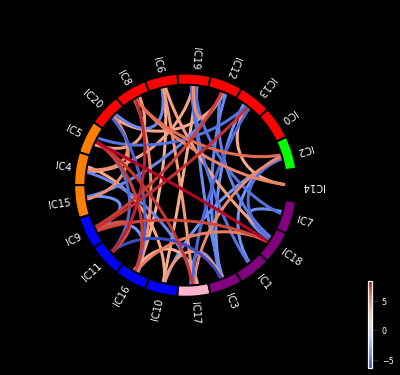

In [28]:

N = 21  # Number of nodes
node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
square_net_tval_rearranged = square_net_tval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
square_net_pval_rearranged = square_net_pval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
con = np.where(square_net_pval_rearranged < 0.0002, square_net_tval_rearranged, np.nan)  # NaN so it doesn't display the weak links
fig, axes = plot_connectivity_circle(con, node_names, node_colors=node_colors, fontsize_names=10, linewidth=3, colormap=cm.coolwarm) 

In [19]:
from mne.viz import plot_connectivity_circle
from matplotlib import cm
sns.set(rc={'figure.figsize':(22,22)})
import cmasher as cmr

# Import packages for plotting
import matplotlib.pyplot as plt
import numpy as np

# Access rainforest colormap through CMasher or MPL
# cmap = cmr.iceburn                   # CMasher
cmap = plt.get_cmap('cmr.iceburn')   # MPL

In [66]:
tabular_tfmri['duration_of_longest_sleep_bout2'] = (tabular_tfmri['duration_of_longest_sleep_bout'] - 7)**2

In [57]:
def plot_functional_connectivity_relation(independent_var, correction_factor=1, save=False):
    pvalues = np.zeros((210,))
    tvalues = np.zeros((210,))
    bvalues = np.zeros((210,))
#     signs = np.sign(tabular_tfmri.loc[:, ['IC_pair{}'.format(idx) for idx in range(210)]].mean())
    for pairwise_connectivity in range(210):
        phenotype_name = 'IC_pair{}'.format(pairwise_connectivity)
        if independent_var.startswith('duration_of_longest_sleep_bout'):
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + actigraphy_time + head_motion'.format(phenotype_name, independent_var),
                               data=tabular_tfmri)
        else:
        
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + head_motion'.format(phenotype_name, independent_var),
                                   data=tabular_tfmri)
        
        lr_results = lr_model.fit()

        pvalues[pairwise_connectivity] = lr_results.pvalues[independent_var]
        tvalues[pairwise_connectivity] = lr_results.tvalues[independent_var]
        bvalues[pairwise_connectivity] = lr_results.params[independent_var]
    # reverse connectivity plot shape
    square_net_pval = np.zeros((21,21))
    square_net_pval[np.triu(np.ones((21,21)),1)>0] = pvalues
    square_net_pval = square_net_pval + square_net_pval.T

    square_net_tval = np.zeros((21,21))
    square_net_tval[np.triu(np.ones((21,21)),1)>0] = tvalues
    square_net_tval = square_net_tval + square_net_tval.T
    
    square_net_bval = np.zeros((21,21))
    square_net_bval[np.triu(np.ones((21,21)),1)>0] = bvalues
    square_net_bval = square_net_bval + square_net_bval.T
    N = 21  # Number of nodes
    node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
    node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
    square_net_tval_rearranged = square_net_tval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    square_net_pval_rearranged = square_net_pval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    square_net_bval_rearranged = square_net_bval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    con = np.where(square_net_pval_rearranged < 0.05/correction_factor, square_net_bval_rearranged, np.nan)  # NaN so it doesn't display the weak links
    
    fig, axes = plot_connectivity_circle(con, node_names, node_colors=node_colors, fontsize_names=12, linewidth=3, colormap='coolwarm',
                                        facecolor='white', textcolor='black', fontsize_colorbar=12, 
                                         vmax=np.nanmax(np.abs(con)), vmin=-np.nanmax(np.abs(con)), colorbar_size=0.4)
    if save:
        fig.savefig('{}_functional_connectivity.png'.format(independent_var), facecolor='white', dpi=600) 
    return con

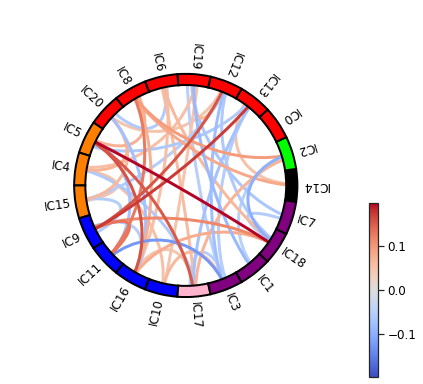

In [67]:
con_vals = plot_functional_connectivity_relation('duration_of_longest_sleep_bout', correction_factor=21*5, save=False)

In [39]:
con_vals_group = np.zeros((4, 21, 21))

In [70]:
tabular_tfmri.columns = tabular_tfmri.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

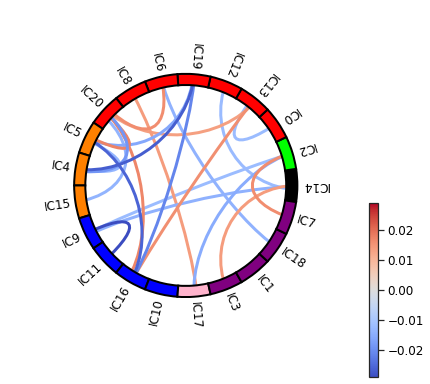

In [71]:
con_vals = plot_functional_connectivity_relation('Number_of_symbol_digit_matches_made_correctly', correction_factor=21*5, save=False)

In [34]:
tabular_tfmri.columns[tabular_tfmri.columns.str.startswith('Frequency')]

Index(['Frequency_of_depressed_mood_in_last_2_weeks',
       'Frequency_of_unenthusiasm_/_disinterest_in_last_2_weeks',
       'Frequency_of_tenseness_/_restlessness_in_last_2_weeks',
       'Frequency_of_tiredness_/_lethargy_in_last_2_weeks'],
      dtype='object')

In [20]:
tabular_tfmri.columns = tabular_tfmri.columns.str.replace('/', '_').str.replace('(', '').str.replace(')', '').str.replace(' ', '_')
tabular_tfmri['phq2'] = tabular_tfmri['Frequency_of_depressed_mood_in_last_2_weeks'] + tabular_tfmri['Frequency_of_unenthusiasm___disinterest_in_last_2_weeks']




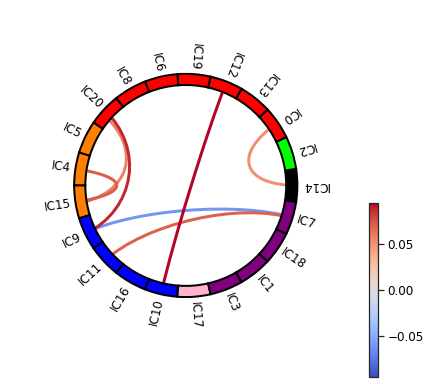

In [74]:
con_vals = plot_functional_connectivity_relation('phq2', correction_factor=21*5, save=False)

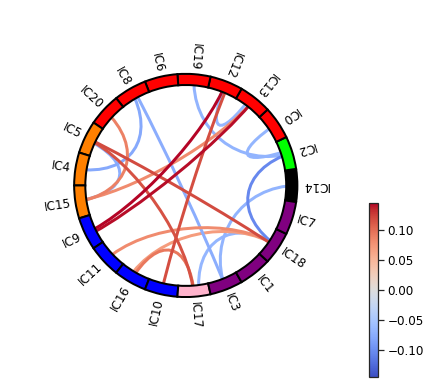

In [77]:
con_vals = plot_functional_connectivity_relation('Sleeplessness___insomnia', correction_factor=21*5, save=False)

In [46]:
for name in tabular_tfmri.columns:
    print(name)

Year_of_birth
Sex
Summed_MET_minutes_per_week_for_all_activity
Mean_time_to_correctly_identify_matches
Maximum_digits_remembered_correctly
Fluid_intelligence_score
Time_to_answer
Duration_to_complete_alphanumeric_path
Total_errors_traversing_alphanumeric_path
Number_of_puzzles_correctly_solved
Number_of_puzzles_viewed
Number_of_puzzles_correct
Number_of_puzzles_attempted
Number_of_symbol_digit_matches_made_correctly
Number_of_symbol_digit_matches_attempted
Number_of_word_pairs_correctly_associated
Mood_swings
Miserableness
Irritability
Sensitivity___hurt_feelings
Fed-up_feelings
Nervous_feelings
Worrier___anxious_feelings
Tense___'highly_strung'
Worry_too_long_after_embarrassment
Suffer_from_'nerves'
Loneliness,_isolation
Guilty_feelings
Risk_taking
Happiness
Frequency_of_depressed_mood_in_last_2_weeks
Frequency_of_unenthusiasm___disinterest_in_last_2_weeks
Frequency_of_tenseness___restlessness_in_last_2_weeks
Frequency_of_tiredness___lethargy_in_last_2_weeks
Length_of_longest_manic_ir

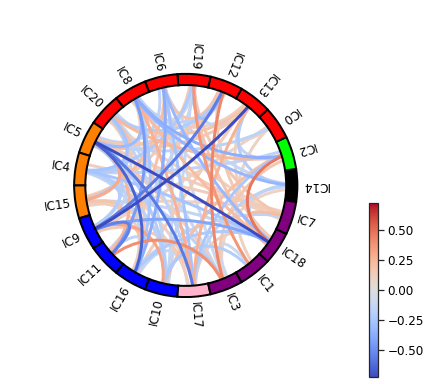

In [80]:
# Daytime dozing / sleeping (narcolepsy)
con_vals = plot_functional_connectivity_relation('Daytime_dozing___sleeping_narcolepsy', correction_factor=21*5, save=False)

In [60]:
def plot_connectivity_circle_width(con, node_names, max_width=20, meta=None):
    con_plot = np.zeros_like(con)
    blank_node_names = node_names.copy()
    blank_node_names[:] = ''
    fig, axes = plt.subplots(1,1)
    for idx1 in range(con.shape[0] - 1):
        for idx2 in range(idx1):
            con_plot[:] = np.nan
            con_plot[idx1, idx2] = con[idx1, idx2]
            con_plot[idx2, idx1] = con[idx2, idx1]
            if np.isnan(con[idx1, idx2]) | (idx1 == idx2):
                continue
            if (np.nanmax(np.abs(con)) - np.nanmin(np.abs(con_vals[np.nonzero(con_vals)]))) == 0:
                line_width = max_width / 2
            else:
                line_width = ((np.abs(con[idx1, idx2]) - np.nanmin(np.abs(con_vals[np.nonzero(con_vals)]))) * max_width) / (np.nanmax(np.abs(con)) - np.nanmin(np.abs(con_vals[np.nonzero(con_vals)])))  + 0.1*max_width
#             print(line_width)
            plot_connectivity_circle(con_plot, blank_node_names, fig=fig, linewidth=line_width, show=False, colorbar=False, **meta) 
    con_plot[:] = np.nan
    plot_connectivity_circle(con_plot, node_names, fig=fig, linewidth=1, show=True, colorbar=True,  **meta) 
    return fig
#     plt.colorbar()
#     plt.show()


/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/mne/viz/circle.py:283: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot(*subplot, polar=True)


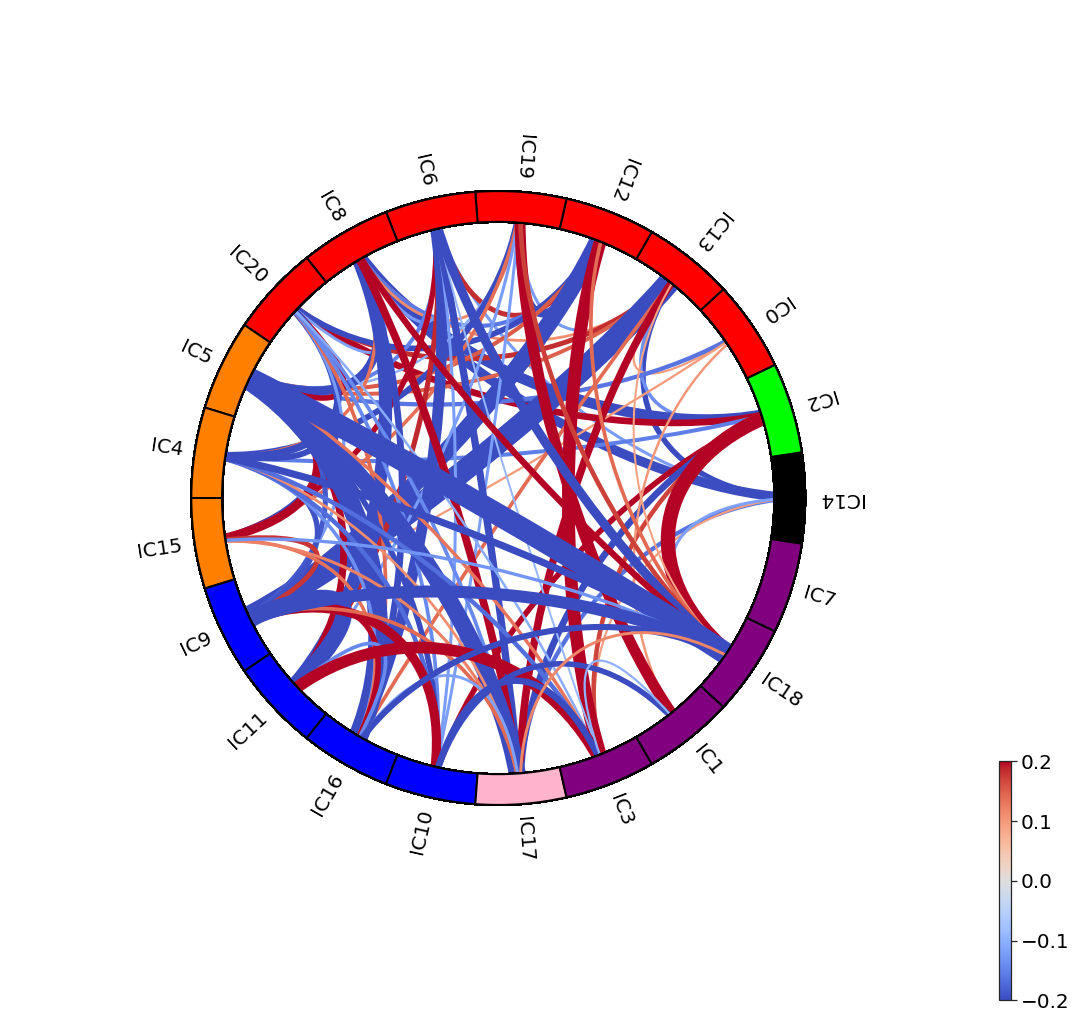

In [81]:
from matplotlib import cm
meta = dict()
meta['node_colors'] = node_colors
meta['facecolor'] = 'white'
meta['textcolor'] = 'black'
meta['fontsize_names'] = 20
meta['vmin'] = -0.2
meta['vmax'] = 0.2
meta['colormap'] = cm.coolwarm
meta['fontsize_colorbar'] = 20

plot_handle = plot_connectivity_circle_width(con_vals, node_names, meta=meta)



In [82]:
independent_var='dozing'
plot_handle.savefig('{}_functional_connectivity_full_230330.pdf'.format(independent_var), facecolor='white', dpi=600) 


In [51]:
con_vals.shape

(21, 21)

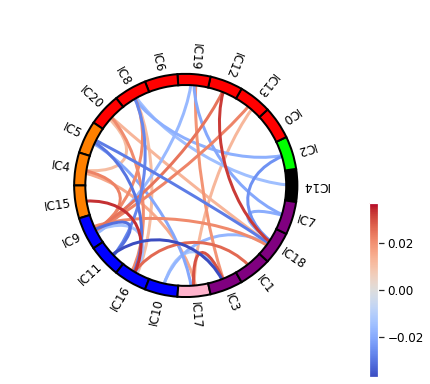

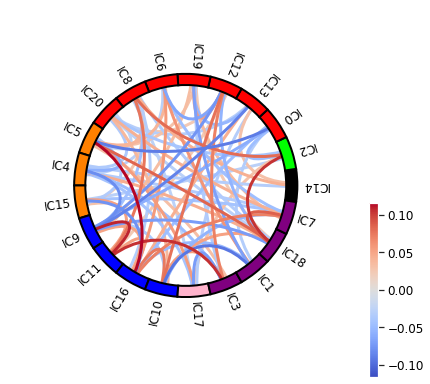

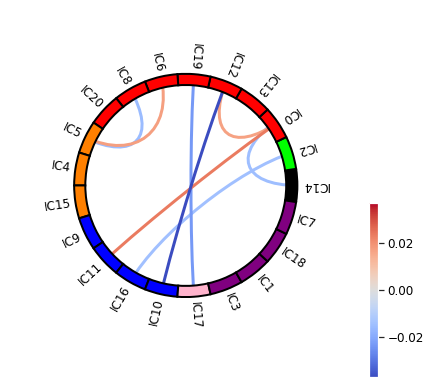

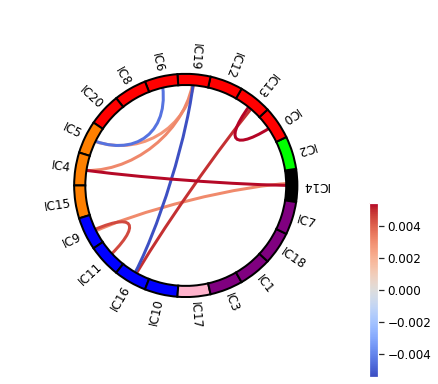

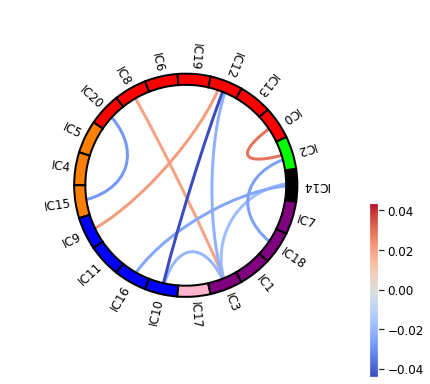

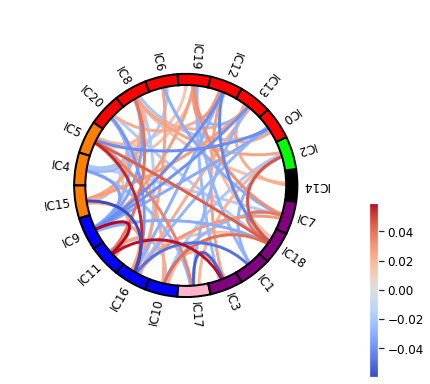

In [51]:
con_vals_group = np.zeros((6, 21, 21))
for idx, var in enumerate(['duration_of_longest_sleep_bout', 'Daytime_dozing___sleeping_narcolepsy', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'bedtime']):
    con_vals = plot_functional_connectivity_relation(var, correction_factor=210, save=False)
    con_vals_group[idx, :, :] = con_vals

In [246]:
con_vals_overlap = np.zeros((21,21))
var_pairs = [[0,1], [0,2], [0,3], [0,4], [1,2], [1,3], [1,4], [2,3], [2,4], [3,4]]
for idx, var_pair in enumerate(var_pairs):
    print(con_vals_group[var_pair, :, :].shape)
    con_vals_overlap_vals = con_vals_group[var_pair, :, :].sum(axis=0)
    con_vals_overlap = con_vals_overlap + (~np.isnan(con_vals_overlap_vals)).astype(int) * idx
#     fig, ax = plt.subplots((1))
#     sns.heatmap(con_vals_overlap)
con_vals_overlap[con_vals_overlap == 0] = np.nan

(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)
(2, 21, 21)


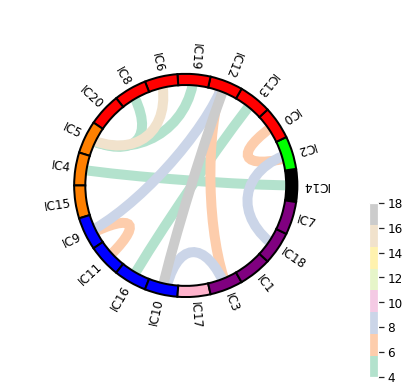

In [247]:
fig, axes = plot_connectivity_circle(con_vals_overlap, node_names, node_colors=node_colors, fontsize_names=12, linewidth=10, colormap='Pastel2',
                                        facecolor='white', textcolor='black', fontsize_colorbar=12, colorbar_size=0.4)


In [63]:
fig.savefig('overlap_functional_connectivity.pdf', facecolor='white', dpi=600) 

In [64]:
with open('valid_subjects_3variables_221102.txt', 'r') as f:
    allvalid_subj_list = f.readlines()
allvalid_subj_list = [int(s.strip()) for s in allvalid_subj_list]
len(allvalid_subj_list)

12914

In [65]:
def plot_functional_connectivity_relation_3valid(independent_var, correction_factor=1, save=False):
    pvalues = np.zeros((210,))
    tvalues = np.zeros((210,))
    bvalues = np.zeros((210,))
    for pairwise_connectivity in range(210):
        phenotype_name = 'IC_pair{}'.format(pairwise_connectivity)
        if independent_var == 'duration_of_longest_sleep_bout':
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + actigraphy_time + head_motion'.format(phenotype_name, independent_var),
                               data=tabular_tfmri.loc[allvalid_subj_list, :])
        else:
        
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + head_motion'.format(phenotype_name, independent_var),
                                   data=tabular_tfmri.loc[allvalid_subj_list, :])
        
        lr_results = lr_model.fit()

        pvalues[pairwise_connectivity] = lr_results.pvalues[independent_var]
        tvalues[pairwise_connectivity] = lr_results.tvalues[independent_var]
        bvalues[pairwise_connectivity] = lr_results.params[independent_var]
    # reverse connectivity plot shape
    square_net_pval = np.zeros((21,21))
    square_net_pval[np.triu(np.ones((21,21)),1)>0] = pvalues
    square_net_pval = square_net_pval + square_net_pval.T

    square_net_tval = np.zeros((21,21))
    square_net_tval[np.triu(np.ones((21,21)),1)>0] = tvalues
    square_net_tval = square_net_tval + square_net_tval.T
    
    square_net_bval = np.zeros((21,21))
    square_net_bval[np.triu(np.ones((21,21)),1)>0] = bvalues
    square_net_bval = square_net_bval + square_net_bval.T
    N = 21  # Number of nodes
    node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
    node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
    square_net_tval_rearranged = square_net_tval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    square_net_pval_rearranged = square_net_pval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    square_net_bval_rearranged = square_net_bval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
    con = np.where(square_net_pval_rearranged < 0.05/correction_factor, square_net_bval_rearranged, np.nan)  # NaN so it doesn't display the weak links
    
    fig, axes = plot_connectivity_circle(con, node_names, node_colors=node_colors, fontsize_names=12, linewidth=3, colormap='coolwarm',
                                        facecolor='white', textcolor='black', fontsize_colorbar=12, 
                                         vmax=np.nanmax(np.abs(con)), vmin=-np.nanmax(np.abs(con)), colorbar_size=0.4)
    if save:
        fig.savefig('{}_functional_connectivity_3valid.png'.format(independent_var), facecolor='white', dpi=600) 
    return con

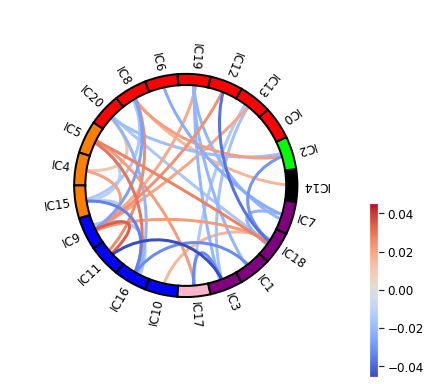

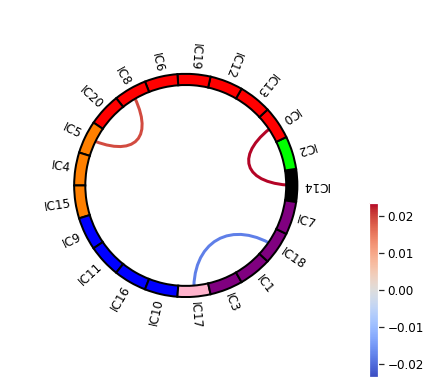

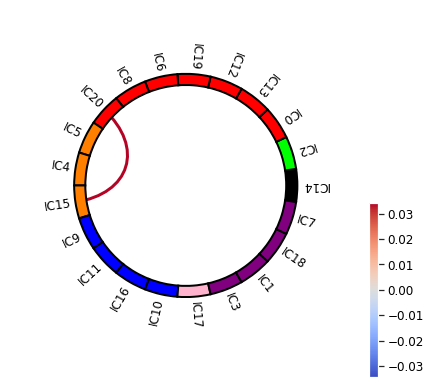

In [66]:
con_vals_group_3valid = np.zeros((3, 21, 21))
for idx, var in enumerate(['duration_of_longest_sleep_bout', 'phq2', 'Sleeplessness___insomnia']):
    con_vals_3valid = plot_functional_connectivity_relation_3valid(var, correction_factor=210, save=False)
    con_vals_group_3valid[idx, :, :] = con_vals_3valid

In [21]:
def collect_functional_connectivity_relation(independent_var, valid_subjects=None):
    pvalues = np.zeros((210,))
    tvalues = np.zeros((210,))
    bvalues = np.zeros((210,))
    if valid_subjects is not None:
        input_data = tabular_tfmri.loc[valid_subjects]
    else:
        input_data = tabular_tfmri
    for pairwise_connectivity in range(210):
        phenotype_name = 'IC_pair{}'.format(pairwise_connectivity)
        if independent_var == 'duration_of_longest_sleep_bout':
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + actigraphy_time + head_motion'.format(phenotype_name, independent_var),
                               data=input_data)
        else:
        
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + head_motion'.format(phenotype_name, independent_var),
                                   data=input_data)
        
        lr_results = lr_model.fit()

        pvalues[pairwise_connectivity] = lr_results.pvalues[independent_var]
        tvalues[pairwise_connectivity] = lr_results.tvalues[independent_var]
        bvalues[pairwise_connectivity] = lr_results.params[independent_var]
    # reverse connectivity plot shape
    square_net_pval = np.zeros((21,21))
    square_net_pval[np.triu(np.ones((21,21)),1)>0] = pvalues
    square_net_pval = square_net_pval + square_net_pval.T

    square_net_tval = np.zeros((21,21))
    square_net_tval[np.triu(np.ones((21,21)),1)>0] = tvalues
    square_net_tval = square_net_tval + square_net_tval.T
    
    square_net_bval = np.zeros((21,21))
    square_net_bval[np.triu(np.ones((21,21)),1)>0] = bvalues
    square_net_bval = square_net_bval + square_net_bval.T
    
    return pvalues, tvalues, bvalues

In [22]:
pvals_all = pd.DataFrame(columns=['Sleep_duration', 'duration_of_longest_sleep_bout', 'phq2', 'cognition', 'sleep_sefrep', 'daytime_dozing'])
tvals_all = pd.DataFrame(columns=['Sleep_duration', 'duration_of_longest_sleep_bout', 'phq2', 'cognition', 'sleep_sefrep', 'daytime_dozing'])
bvals_all = pd.DataFrame(columns=['Sleep_duration', 'duration_of_longest_sleep_bout', 'phq2', 'cognition', 'sleep_sefrep', 'daytime_dozing'])
for idx, var in enumerate(['Sleep_duration', 'duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']):
    pvals, tvals, bvals = collect_functional_connectivity_relation(var)
    bvals_all.iloc[:, idx] = bvals
    pvals_all.iloc[:, idx] = pvals
    tvals_all.iloc[:, idx] = tvals
print(bvals_all)
#     break

     Sleep_duration  duration_of_longest_sleep_bout      phq2  cognition  \
0         -0.017187                       -0.006724  0.007968   0.009155   
1         -0.039764                        0.002969 -0.025134   0.011443   
2          0.015811                        0.006316  0.008909  -0.006255   
3          0.022234                       -0.007948  0.014942   0.001255   
4          0.070394                        0.038391  0.018265   0.007640   
..              ...                             ...       ...        ...   
205       -0.018776                       -0.020636 -0.043782   0.008001   
206        0.049924                        0.044963  0.014472   0.001621   
207       -0.084524                       -0.043731  0.003254   0.002781   
208       -0.011289                       -0.024886 -0.039652   0.000029   
209       -0.055135                       -0.008411 -0.026547   0.007888   

     sleep_sefrep  daytime_dozing  
0       -0.049508        0.102718  
1       -0.0670

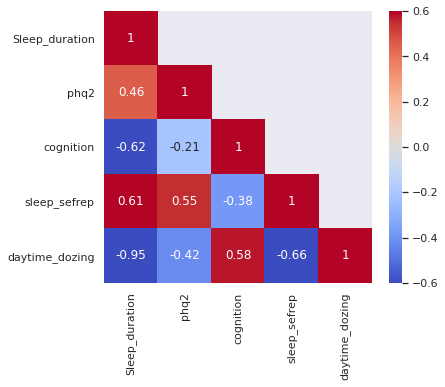

In [29]:
fig, ax = plt.subplots(1,1, figsize=(6, 5))
correlation_values = bvals_all.corr()
correlation_values.values[np.triu_indices(5,1)] = np.nan
sns.heatmap(correlation_values, 
            annot=True, cmap='coolwarm', center=0.0, vmin=-.6, vmax=.6)
fig.savefig('corr_plot_functionalconn_full_selfrepsleep_230917.pdf')

<AxesSubplot:xlabel='sleep_quality', ylabel='sleep_sefrep'>

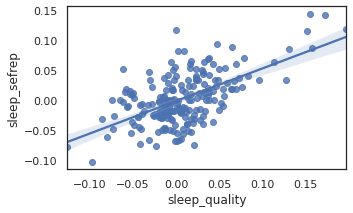

In [36]:
sns.set_style(style='white')
fig, ax = plt.subplots(1,1, figsize=(5, 3))
sns.regplot(data=bvals_all, x='sleep_quality', y='sleep_sefrep')
# fig.savefig('reg_plot_fc_sleepquality_insomnia_221207.pdf')

<AxesSubplot:xlabel='sleep_quality', ylabel='phq2'>

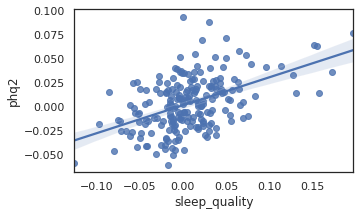

In [39]:
fig, ax = plt.subplots(1,1, figsize=(5, 3))
sns.regplot(data=bvals_all, x='sleep_quality', y='phq2')
# fig.savefig('reg_plot_fc_sleepquality_phq2_221207.pdf')

In [25]:
variables = ['Sleep_duration', 'sleep_quality', 'phq2', 'cognition', 'sleep_sefrep', 'daytime_dozing']
for var1 in variables:
    for var2 in variables:
        corrvals = pearsonr_ci(bvals_all[var1], 
                               bvals_all[var2], alpha=0.05/5)
        print(var1, var2, corrvals)

Sleep_duration Sleep_duration (1.0, 0.0, 1.0, 1.0)
Sleep_duration sleep_quality (0.9320510432107729, 1.1629987151107554e-93, 0.9041964476524338, 0.9520110977740982)
Sleep_duration phq2 (0.4550415268611074, 3.95894723693845e-12, 0.3022623369892392, 0.5850276204529248)
Sleep_duration cognition (-0.6207368311657439, 9.250587058961163e-24, -0.7188375405886447, -0.49839647905206247)
Sleep_duration sleep_sefrep (0.6055399786489746, 2.1166537038755064e-22, 0.47987071166790385, 0.7068605631093675)
Sleep_duration daytime_dozing (-0.9505531804761883, 1.3520412721953748e-107, -0.965176181231747, -0.9300084763204489)
sleep_quality Sleep_duration (0.9320510432107729, 1.1629987151107554e-93, 0.9041964476524338, 0.9520110977740982)
sleep_quality sleep_quality (0.9999999999999998, 0.0, 0.9999999999999997, 0.9999999999999999)
sleep_quality phq2 (0.47917952924420615, 1.8747073382733856e-13, 0.33005164284274, 0.6049712164422948)
sleep_quality cognition (-0.5715993595874368, 1.2974633760248957e-19, -0.679

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in arctanh


In [41]:
print(variables)

['sleep_quality', 'phq2', 'cognition', 'sleep_sefrep', 'daytime_dozing']


In [42]:

tabular_tfmri['sleep_quality_quantiles'] = pd.qcut(tabular_tfmri['duration_of_longest_sleep_bout'], 2)
# tabular_tfmri['phq2_quantiles'] = pd.qcut(tabular_tfmri['phq2'], 3)

In [43]:
tabular_tfmri[['sleep_quality_quantiles']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30862 entries, 1000177 to 6022251
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   sleep_quality_quantiles  12993 non-null  category
dtypes: category(1)
memory usage: 271.4 KB


In [44]:
tabular_tfmri['sleep_quality_quantiles'].dropna().unique()

[(6.8, 11.467], (0.92, 6.8]]
Categories (2, interval[float64]): [(0.92, 6.8] < (6.8, 11.467]]

In [46]:
def collect_functional_connectivity_relation_ext_data(data_df, independent_var, valid_subjects=None):
    pvalues = np.zeros((210,))
    tvalues = np.zeros((210,))
    bvalues = np.zeros((210,))
    if valid_subjects is not None:
        input_data = data_df.loc[valid_subjects].copy(deep=True)
    else:
        input_data = data_df.copy(deep=True)
    for pairwise_connectivity in range(210):
        phenotype_name = 'IC_pair{}'.format(pairwise_connectivity)
        if independent_var == 'duration_of_longest_sleep_bout':
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + actigraphy_time + head_motion'.format(phenotype_name, independent_var),
                               data=input_data)
        else:
        
            lr_model = smf.ols('{} ~ {} + C(site) + age + C(sex) + age:C(sex) + ses + education + C(ethnicity) + head_motion'.format(phenotype_name, independent_var),
                                   data=input_data)
        
        lr_results = lr_model.fit()

        pvalues[pairwise_connectivity] = lr_results.pvalues[independent_var]
        tvalues[pairwise_connectivity] = lr_results.tvalues[independent_var]
        bvalues[pairwise_connectivity] = lr_results.params[independent_var]
    # reverse connectivity plot shape
    square_net_pval = np.zeros((21,21))
    square_net_pval[np.triu(np.ones((21,21)),1)>0] = pvalues
    square_net_pval = square_net_pval + square_net_pval.T

    square_net_tval = np.zeros((21,21))
    square_net_tval[np.triu(np.ones((21,21)),1)>0] = tvalues
    square_net_tval = square_net_tval + square_net_tval.T
    
    square_net_bval = np.zeros((21,21))
    square_net_bval[np.triu(np.ones((21,21)),1)>0] = bvalues
    square_net_bval = square_net_bval + square_net_bval.T
    
    return pvalues, tvalues, bvalues

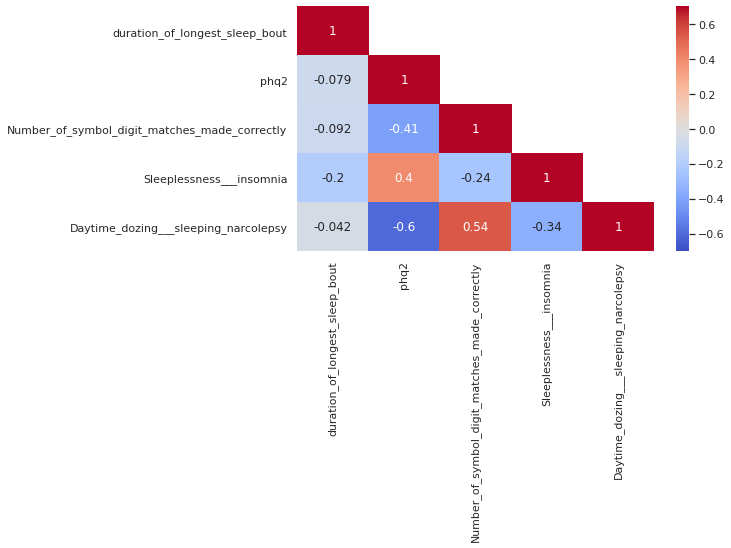

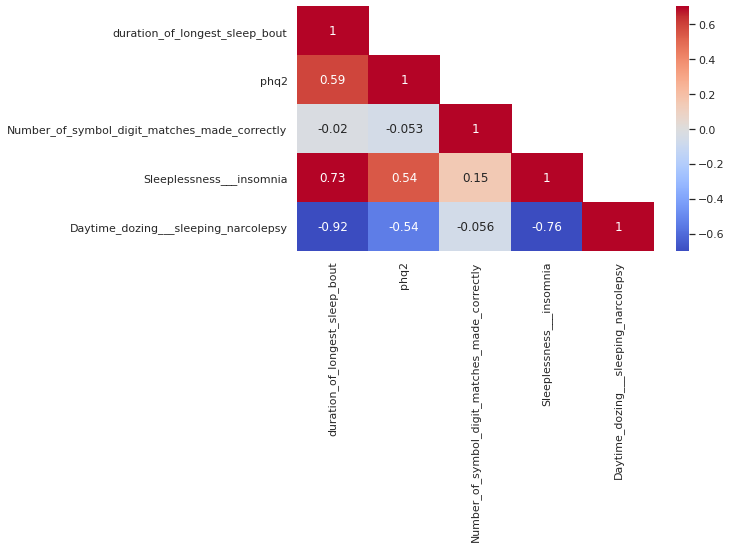

In [90]:
pvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'sleep_quantile'], index=np.arange(210*2))
tvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'sleep_quantile'], index=np.arange(210*2))
bvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'sleep_quantile'], index=np.arange(210*2))
for idx0, var0 in enumerate(tabular_tfmri['sleep_quality_quantiles'].cat.categories):
    for idx, var in enumerate(['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']):
        
        pvals, tvals, bvals = collect_functional_connectivity_relation_ext_data(tabular_tfmri.loc[tabular_tfmri['sleep_quality_quantiles'] == var0],
                                                                       var
                                                                       )
        bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = bvals
        pvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = pvals
        tvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = tvals
    bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), 'sleep_quantile'] = var0
    fig, ax = plt.subplots(1,1, figsize=(8, 4.5))
    correlation_values = bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), ['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float).corr()
    correlation_values.values[np.triu_indices(5,1)] = np.nan
    # np.fill_diagonal(correlation_values.values, np.nan)
    sns.heatmap(correlation_values, 
                annot=True, cmap='coolwarm', center=0.0, vmin=-.7, vmax=.7)
    fig.savefig('corr_plot_functionalconn_full_sleep_quantile_{}_230330.pdf'.format(var0))

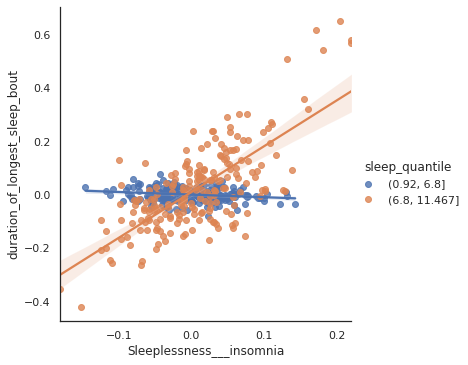

In [48]:
# fig, ax = plt.subplots(1,1)
bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']] = bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float)
bvals_quantile_long = pd.melt(bvals_quantile, id_vars=['sleep_quantile'], value_vars=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'])
fig = sns.lmplot(data=bvals_quantile, y='duration_of_longest_sleep_bout', x='Sleeplessness___insomnia', hue='sleep_quantile')
fig.savefig('reg_plot_functionalconn_full_sleep_quantile_sleepquality_insomnia_230330.pdf')

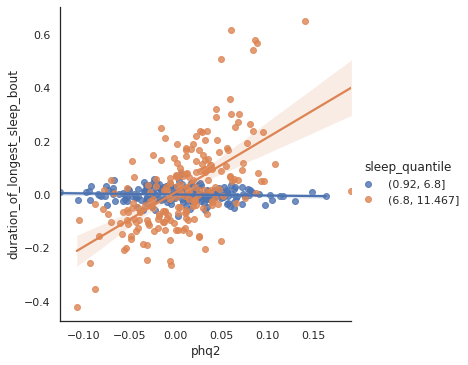

In [49]:
# fig, ax = plt.subplots(1,1)
bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']] = bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float)
bvals_quantile_long = pd.melt(bvals_quantile, id_vars=['sleep_quantile'], value_vars=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'])
fig = sns.lmplot(data=bvals_quantile, y='duration_of_longest_sleep_bout', x='phq2', hue='sleep_quantile')
fig.savefig('reg_plot_functionalconn_full_sleep_quantile_sleepquality_phq2_230330.pdf')

In [50]:
variables = ['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']
for idx0, var0 in enumerate(tabular_tfmri['sleep_quality_quantiles'].cat.categories):
    print(idx0, var0)
    for var1 in variables:
        for var2 in variables:
            corrvals = pearsonr_ci(bvals_quantile.loc[bvals_quantile['sleep_quantile'] == var0, var1], 
                                   bvals_quantile.loc[bvals_quantile['sleep_quantile'] == var0, var2], 
                                   alpha=0.05/5)
            print(var1, var2, corrvals)

0 (0.92, 6.8]
duration_of_longest_sleep_bout duration_of_longest_sleep_bout (1.0, 0.0, 1.0, 1.0)
duration_of_longest_sleep_bout phq2 (-0.07875778097569361, 0.2558467685389706, -0.25238060427720227, 0.09977817160688514)
duration_of_longest_sleep_bout Number_of_symbol_digit_matches_made_correctly (-0.091731314527717, 0.18544583373822285, -0.2645759511474884, 0.0868234366705485)
duration_of_longest_sleep_bout Sleeplessness___insomnia (-0.2014793701185552, 0.003363334132795593, -0.36557557162913284, -0.02523616887173465)
duration_of_longest_sleep_bout Daytime_dozing___sleeping_narcolepsy (-0.04158698875388814, 0.5489628517318722, -0.21713130949560444, 0.13656295570323548)
phq2 duration_of_longest_sleep_bout (-0.07875778097569361, 0.2558467685389706, -0.25238060427720227, 0.09977817160688514)
phq2 phq2 (1.0, 0.0, 1.0, 1.0)
phq2 Number_of_symbol_digit_matches_made_correctly (-0.41352095964792784, 4.4266338368058166e-10, -0.5503502130956373, -0.25506096688495034)
phq2 Sleeplessness___insomnia

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in arctanh


In [51]:
tabular_tfmri['depressed'] = tabular_tfmri['phq2'] >= 7

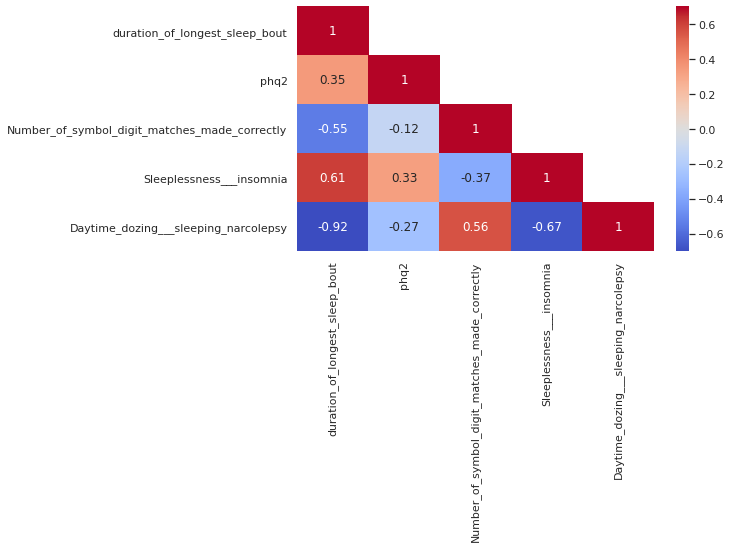

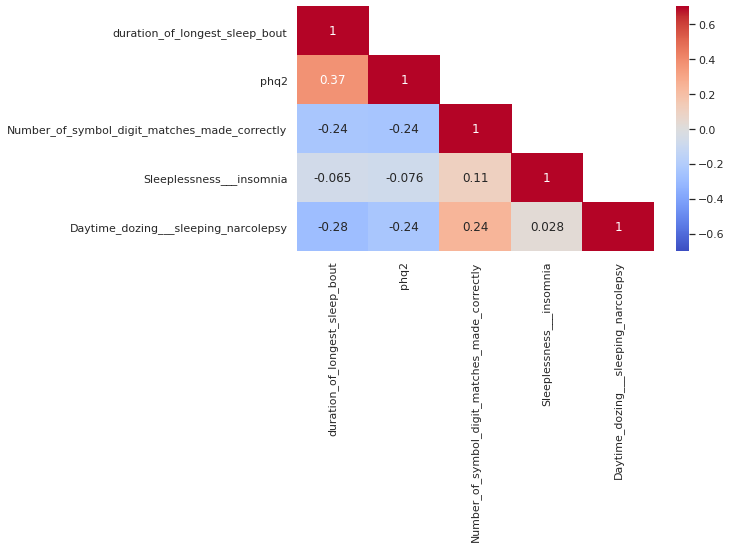

In [91]:
pvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'depressed'], index=np.arange(210*2))
tvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'depressed'], index=np.arange(210*2))
bvals_quantile = pd.DataFrame(columns=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy', 'depressed'], index=np.arange(210*2))
for idx0, var0 in enumerate(tabular_tfmri['depressed'].unique()):
    for idx, var in enumerate(['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']):
        
        pvals, tvals, bvals = collect_functional_connectivity_relation_ext_data(tabular_tfmri.loc[tabular_tfmri['depressed'] == var0],
                                                                       var
                                                                       )
        bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = bvals
        pvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = pvals
        tvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), var] = tvals
    bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), 'depressed'] = var0
    fig, ax = plt.subplots(1,1, figsize=(8, 4.5))
    correlation_values = bvals_quantile.loc[np.arange(idx0*210, (idx0+1)*210), ['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float).corr()
    correlation_values.values[np.triu_indices(5,1)] = np.nan
    # np.fill_diagonal(correlation_values.values, np.nan)
    sns.heatmap(correlation_values, 
                annot=True, cmap='coolwarm', center=0.0, vmin=-.7, vmax=.7)
    
    fig.savefig('corr_plot_functionalconn_full_depressed_{}_230330.pdf'.format(var0))

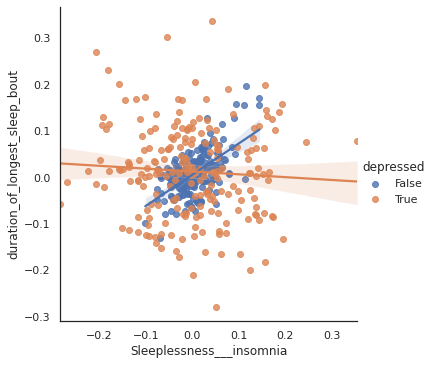

In [53]:
bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']] = bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float)
bvals_quantile_long = pd.melt(bvals_quantile, id_vars=['depressed'], value_vars=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'])
fig = sns.lmplot(data=bvals_quantile, y='duration_of_longest_sleep_bout', x='Sleeplessness___insomnia', hue='depressed')
fig.savefig('reg_plot_functionalconn_full_depressed_sleepquality_insomnia_230330.pdf')

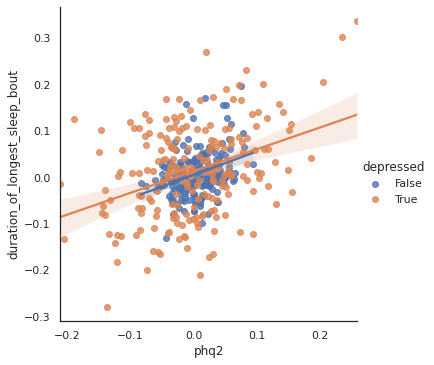

In [55]:
bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']] = bvals_quantile[['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']].astype(float)
bvals_quantile_long = pd.melt(bvals_quantile, id_vars=['depressed'], value_vars=['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy'])
fig = sns.lmplot(data=bvals_quantile, y='duration_of_longest_sleep_bout', x='phq2', hue='depressed')
fig.savefig('reg_plot_functionalconn_full_depressed_sleepquality_phq2_230330.pdf')

In [56]:
variables = ['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']
for idx0, var0 in enumerate(tabular_tfmri['depressed'].unique()):
    print(idx0, var0)
    for var1 in variables:
        for var2 in variables:
            corrvals = pearsonr_ci(bvals_quantile.loc[bvals_quantile['depressed'] == var0, var1], 
                                   bvals_quantile.loc[bvals_quantile['depressed'] == var0, var2], 
                                   alpha=0.05/5)
            print(var1, var2, corrvals)

0 False
duration_of_longest_sleep_bout duration_of_longest_sleep_bout (1.0, 0.0, 1.0, 1.0)
duration_of_longest_sleep_bout phq2 (0.34750668258174544, 2.3692340091650728e-07, 0.18153802408439848, 0.49422663968160724)
duration_of_longest_sleep_bout Number_of_symbol_digit_matches_made_correctly (-0.5452483605395054, 1.1624645440387785e-17, -0.6587639503584785, -0.4074599668689753)
duration_of_longest_sleep_bout Sleeplessness___insomnia (0.6077595880333867, 1.3540363506319448e-22, 0.4825695622385799, 0.7086135171802278)
duration_of_longest_sleep_bout Daytime_dozing___sleeping_narcolepsy (-0.9212362715539302, 3.075954554809301e-87, -0.9442815558845717, -0.8892025713271242)
phq2 duration_of_longest_sleep_bout (0.34750668258174544, 2.3692340091650728e-07, 0.18153802408439848, 0.49422663968160724)
phq2 phq2 (0.9999999999999999, 0.0, 0.9999999999999999, 0.9999999999999999)
phq2 Number_of_symbol_digit_matches_made_correctly (-0.12041214182624582, 0.08170772487125025, -0.29134164530868406, 0.05796

/external/rprshnas01/kcni/mabdelhack/viz/lib64/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in arctanh


Number_of_symbol_digit_matches_made_correctly duration_of_longest_sleep_bout (-0.23809308592865694, 0.0005016365435021496, -0.39843240795148416, -0.06363301769807367)
Number_of_symbol_digit_matches_made_correctly phq2 (-0.24458572063930897, 0.0003466023609402508, -0.40421619975235434, -0.07049619884098958)
Number_of_symbol_digit_matches_made_correctly Number_of_symbol_digit_matches_made_correctly (0.9999999999999998, 0.0, 0.9999999999999997, 0.9999999999999999)
Number_of_symbol_digit_matches_made_correctly Sleeplessness___insomnia (0.10500030370527352, 0.12933926914411414, -0.07351091263881736, 0.2769921066046153)
Number_of_symbol_digit_matches_made_correctly Daytime_dozing___sleeping_narcolepsy (0.24104184735271547, 0.00042462419111365015, 0.06674802619171599, 0.4010608155529016)
Sleeplessness___insomnia duration_of_longest_sleep_bout (-0.0646891441471163, 0.350914509369176, -0.2390932077259498, 0.1137583467937288)
Sleeplessness___insomnia phq2 (-0.07639699408199394, 0.270417712473685

<AxesSubplot:>

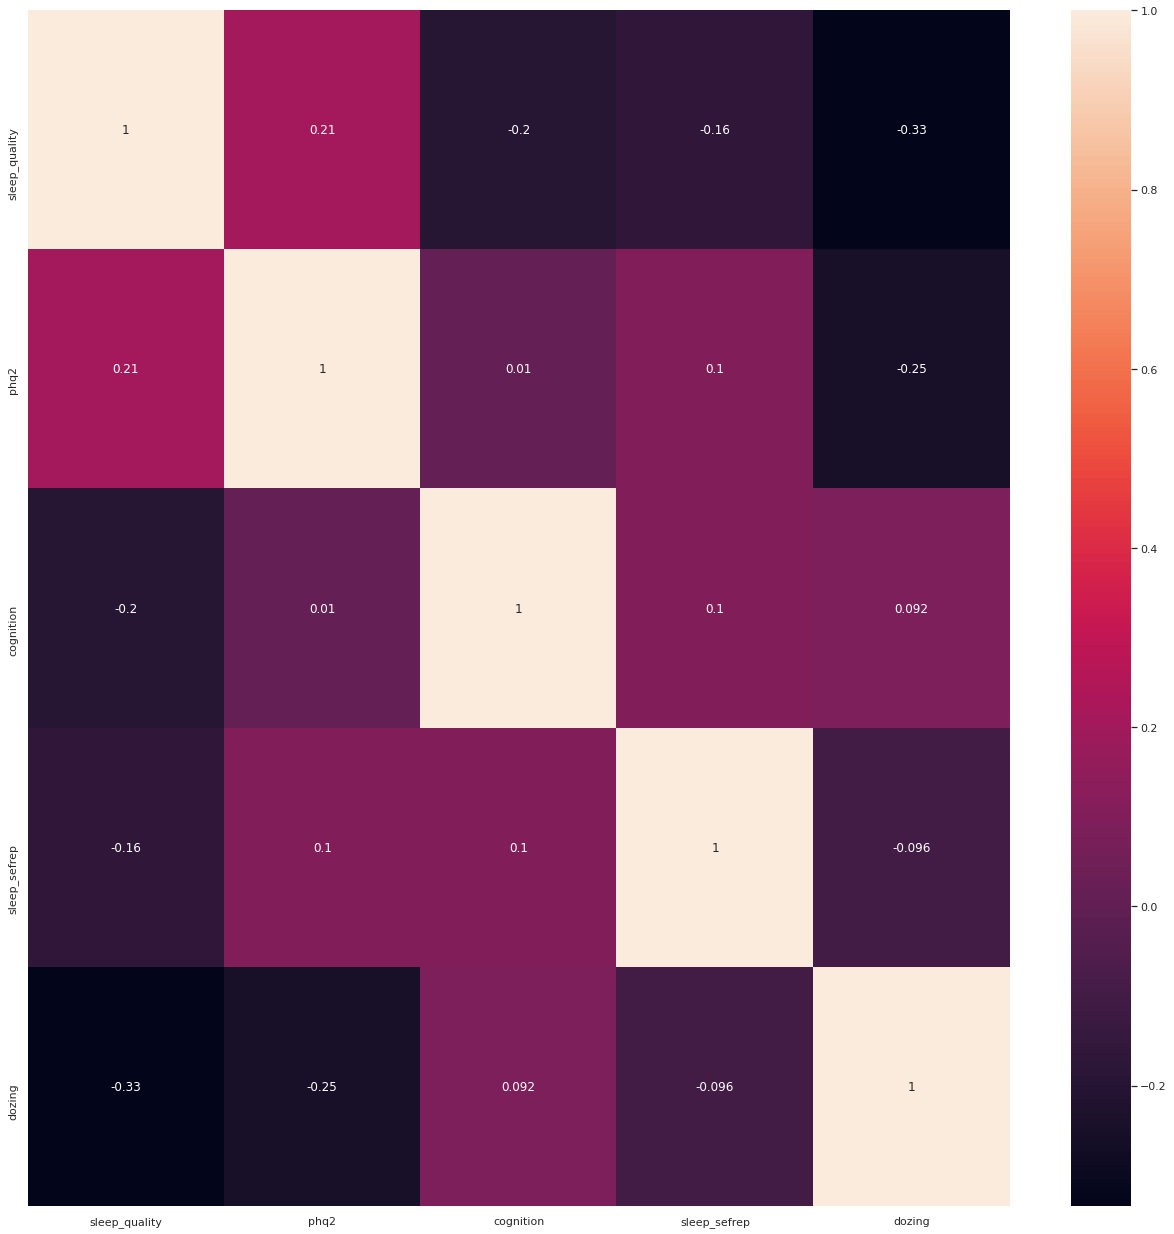

In [307]:
pvals_alld = pd.DataFrame(columns=['sleep_quality', 'phq2', 'cognition', 'sleep_sefrep', 'dozing'])
tvals_alld = pd.DataFrame(columns=['sleep_quality', 'phq2', 'cognition', 'sleep_sefrep', 'dozing'])
bvals_alld = pd.DataFrame(columns=['sleep_quality', 'phq2', 'cognition', 'sleep_sefrep', 'dozing'])
for idx, var in enumerate(['duration_of_longest_sleep_bout', 'phq2', 'Number_of_symbol_digit_matches_made_correctly', 'Sleeplessness___insomnia', 'Daytime_dozing___sleeping_narcolepsy']):
    pvals, tvals, bvals = collect_functional_connectivity_relation_ext_data(tabular_tfmri.loc[(tabular_tfmri['phq2'] >= 7)],
                                                               var
                                                               )
    bvals_alld.iloc[:, idx] = bvals
    pvals_alld.iloc[:, idx] = pvals
    tvals_alld.iloc[:, idx] = tvals
sns.heatmap(bvals_alld.corr(), annot=True)
#     break

<AxesSubplot:xlabel='phq2', ylabel='sleep_sefrep'>

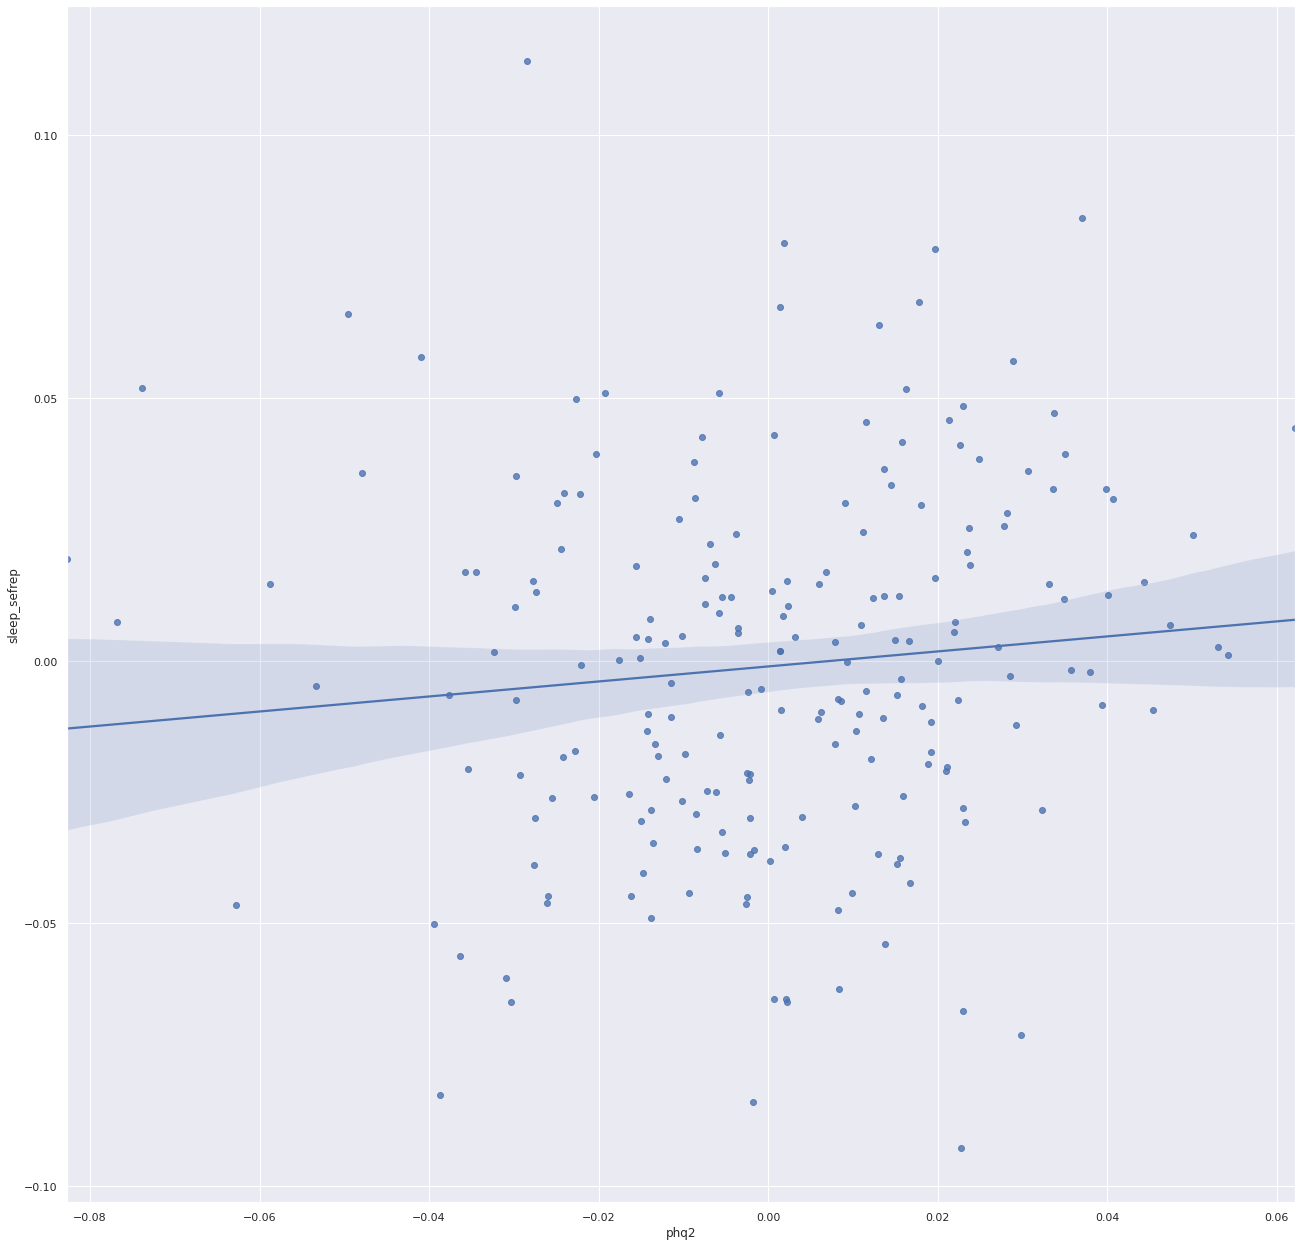

In [309]:
sns.regplot(data=bvals_alld, x='phq2', y='sleep_sefrep')

In [313]:
pearsonr_ci(bvals_alld['sleep_quality'], bvals_alld['phq2'])

(0.2055931314349573,
 0.0027571598086724575,
 0.07221276519981301,
 0.3317492116225359)

In [135]:
np.array(mean_diff).max()

0.07401644212118175

In [138]:
bvals_all['mean_diff'] = mean_diff

<AxesSubplot:>

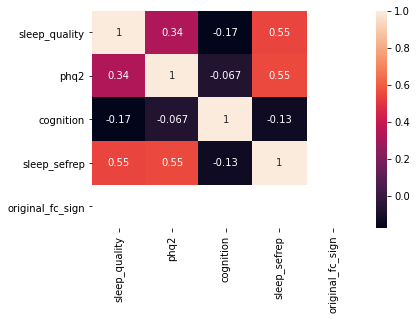

In [146]:
sns.heatmap(bvals_all.corr(), annot=True)

In [165]:
signs = np.sign(tabular_tfmri.loc[:, ['IC_pair{}'.format(idx) for idx in range(210)]].mean())

In [171]:
bvals_all_sgn = bvals_all.copy(deep=True)

In [172]:
bvals_all_sgn  =bvals_all_sgn.multiply(signs.values, axis='index')

<AxesSubplot:>

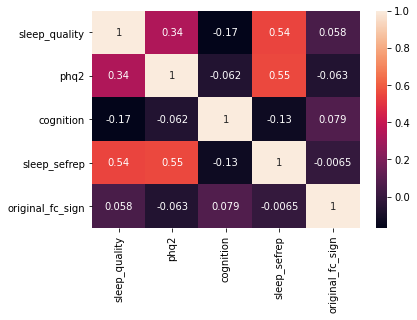

In [177]:
sns.heatmap(bvals_all_sgn.corr(), annot=True)

In [175]:
signs.value_counts()

-1.0    147
 1.0     63
dtype: int64

In [166]:
signs

IC_pair0     -1.0
IC_pair1     -1.0
IC_pair2     -1.0
IC_pair3     -1.0
IC_pair4      1.0
             ... 
IC_pair205    1.0
IC_pair206    1.0
IC_pair207    1.0
IC_pair208   -1.0
IC_pair209   -1.0
Length: 210, dtype: float64

In [188]:
original_fc = tabular_tfmri.loc[:, ['IC_pair{}'.format(idx) for idx in range(210)]].mean().values

original_fc_sq = np.zeros((21,21))
original_fc_sq[np.triu(np.ones((21,21)),1)>0] = original_fc
original_fc_sq = original_fc_sq + original_fc_sq.T

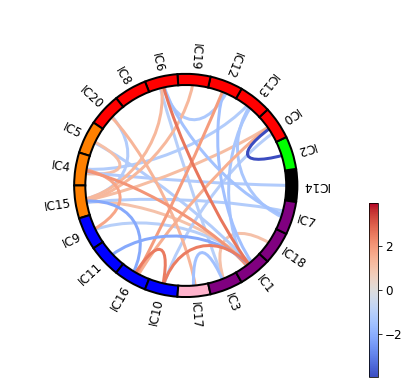

In [193]:

N = 21  # Number of nodes
node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
original_fc_sq_rearranged = original_fc_sq[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]

con = np.where(np.abs(original_fc_sq_rearranged) > 1, original_fc_sq_rearranged, np.nan)  # NaN so it doesn't display the weak links

fig, axes = plot_connectivity_circle(con, node_names, node_colors=node_colors, fontsize_names=12, linewidth=3, colormap='coolwarm',
                                    facecolor='white', textcolor='black', fontsize_colorbar=12, 
                                     vmax=np.nanmax(np.abs(con)), vmin=-np.nanmax(np.abs(con)), colorbar_size=0.4)

In [205]:
# Frequency_of_depressed_mood_in_last_2_weeks
# Frequency_of_unenthusiasm___disinterest_in_last_2_weeks
tabular_tfmri.loc[tabular_tfmri['Frequency_of_depressed_mood_in_last_2_weeks']==0.0, 'Frequency_of_depressed_mood_in_last_2_weeks'] = np.nan
tabular_tfmri.loc[tabular_tfmri['Frequency_of_depressed_mood_in_last_2_weeks']==1.0, 'Frequency_of_depressed_mood_in_last_2_weeks'] = np.nan
tabular_tfmri.loc[tabular_tfmri['Frequency_of_unenthusiasm___disinterest_in_last_2_weeks']==0.0, 'Frequency_of_unenthusiasm___disinterest_in_last_2_weeks'] = np.nan
tabular_tfmri.loc[tabular_tfmri['Frequency_of_unenthusiasm___disinterest_in_last_2_weeks']==1.0, 'Frequency_of_unenthusiasm___disinterest_in_last_2_weeks'] = np.nan
tabular_tfmri.loc[tabular_tfmri['Sleeplessness___insomnia']==0.0, 'Sleeplessness___insomnia'] = np.nan

eid
1026104    1.0
1033082    1.0
1035486    1.0
1040937    1.0
1048840    1.0
          ... 
5990953    1.0
5996657    1.0
5999256    1.0
6004648    1.0
6012209    1.0
Name: Frequency_of_depressed_mood_in_last_2_weeks, Length: 655, dtype: float64

In [224]:
tabular_tfmri['Daytime_dozing___sleeping_narcolepsy'].value_counts()

2.0    23707
3.0     6232
4.0      703
1.0       21
0.0        8
Name: Daytime_dozing___sleeping_narcolepsy, dtype: int64

In [229]:
tabular_tfmri[['Daytime_dozing___sleeping_narcolepsy']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30862 entries, 1000177 to 6022251
Data columns (total 1 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Daytime_dozing___sleeping_narcolepsy  30671 non-null  float64
dtypes: float64(1)
memory usage: 482.2 KB


In [245]:
tabular_tfmri.corr().loc['Daytime_dozing___sleeping_narcolepsy', 'phq2']

0.07626908627024788

<AxesSubplot:xlabel='duration_of_longest_sleep_bout', ylabel='Density'>

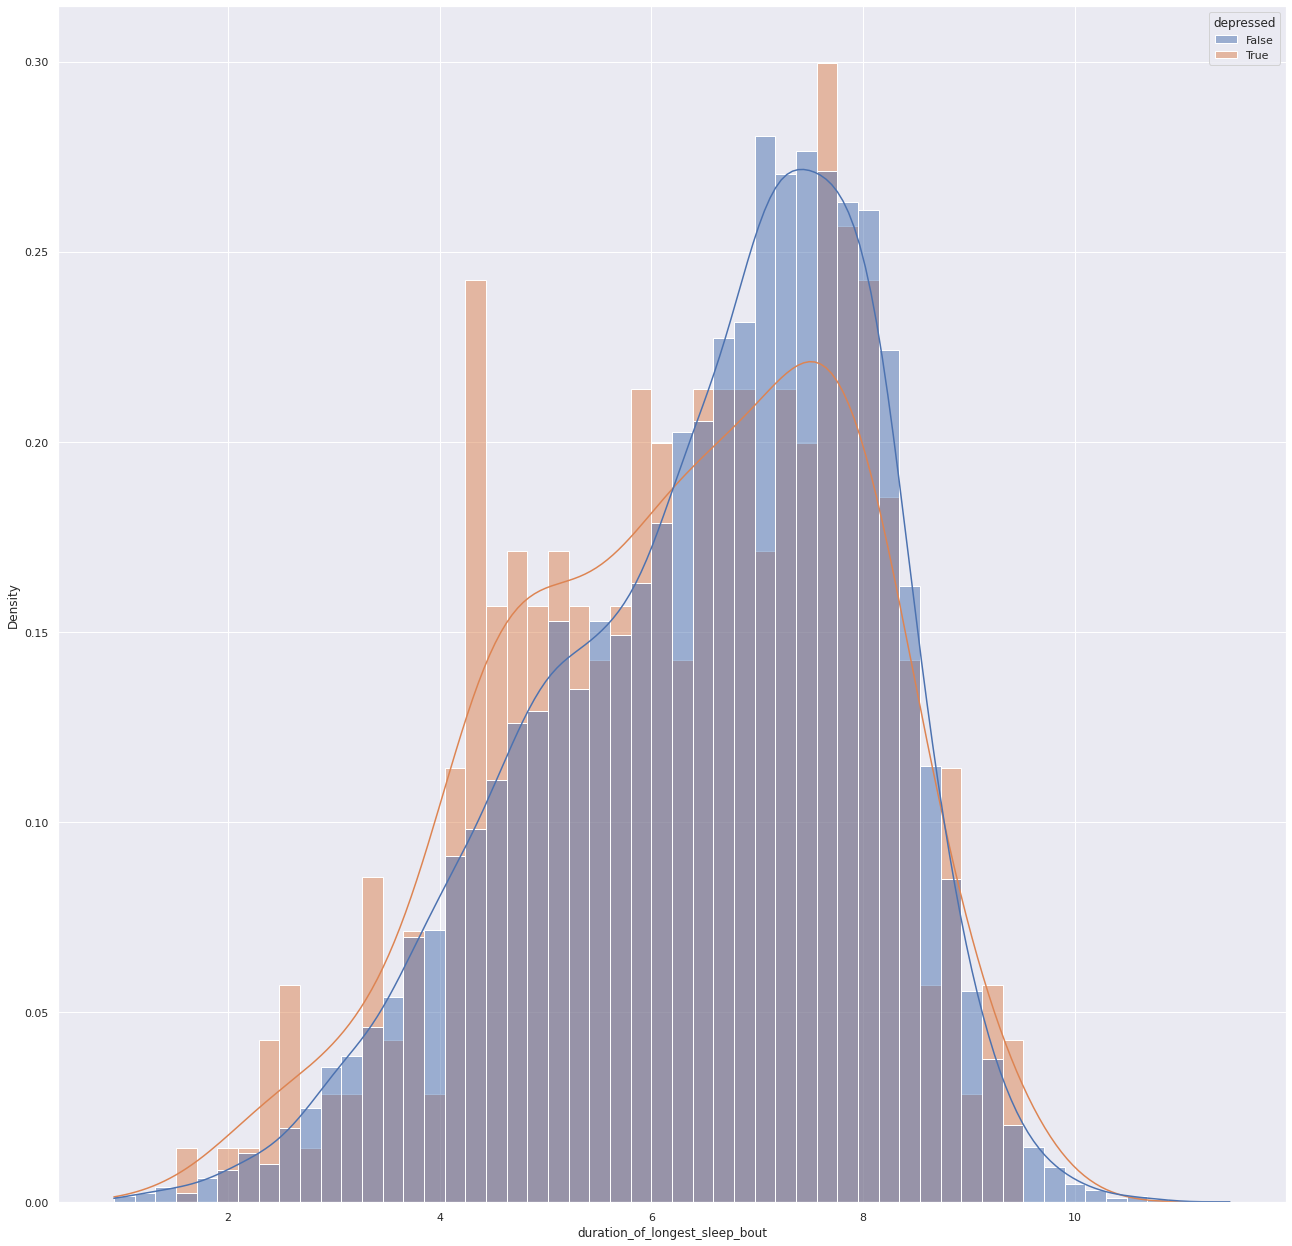

In [290]:
sns.histplot(data=tabular_tfmri, x="duration_of_longest_sleep_bout", hue="depressed", 
             stat="density", common_norm=False, kde=True)

In [71]:
from sklearn.decomposition import PCA

In [72]:
from scipy.stats import zscore


pca = PCA(n_components=5)
bvals_all.apply(zscore)

,sleep_quality,phq2,cognition,sleep_sefrep,daytime_dozing
0,-0.740317,0.302112,1.732611,-0.933374,0.921513
1,-1.009370,-1.985141,1.657135,-2.849660,1.306992
2,-0.462009,1.257446,-1.375922,0.910141,0.336741
3,-0.483419,0.252856,0.720987,0.332370,-0.294246
4,1.594191,-0.141109,0.423863,1.380216,-2.374219
...,...,...,...,...,...
205,-0.617384,-2.944248,1.183127,-1.923460,0.682953
206,0.417460,-0.041319,0.819482,1.017040,-0.756781
207,-0.443680,0.158012,-0.108289,-0.472564,0.686211
208,-1.096442,-0.766683,-0.048453,-0.170635,0.762331


In [73]:
pca.fit(bvals_all.apply(zscore))

PCA(n_components=5)

In [74]:
print(pca.explained_variance_ratio_)

[0.52815024 0.19341446 0.17732522 0.07405235 0.02705772]


In [75]:
pca.components_

array([[ 0.534812  ,  0.36895434, -0.1517318 ,  0.51413562, -0.53897202],
       [-0.07781889,  0.05054564, -0.9773715 , -0.05213427,  0.18280134],
       [-0.38122898,  0.78977467,  0.12802545,  0.26546773,  0.37954816],
       [ 0.37958538,  0.47440083,  0.0251719 , -0.79153987, -0.06074371],
       [ 0.64691556, -0.11188234,  0.06854395,  0.18957346,  0.72687428]])

In [76]:
bvals_all_pca = pca.transform(bvals_all)

(-0.09479298278764182,
 0.09183592759724886,
 -0.023317973145176234,
 0.027401523875381646)

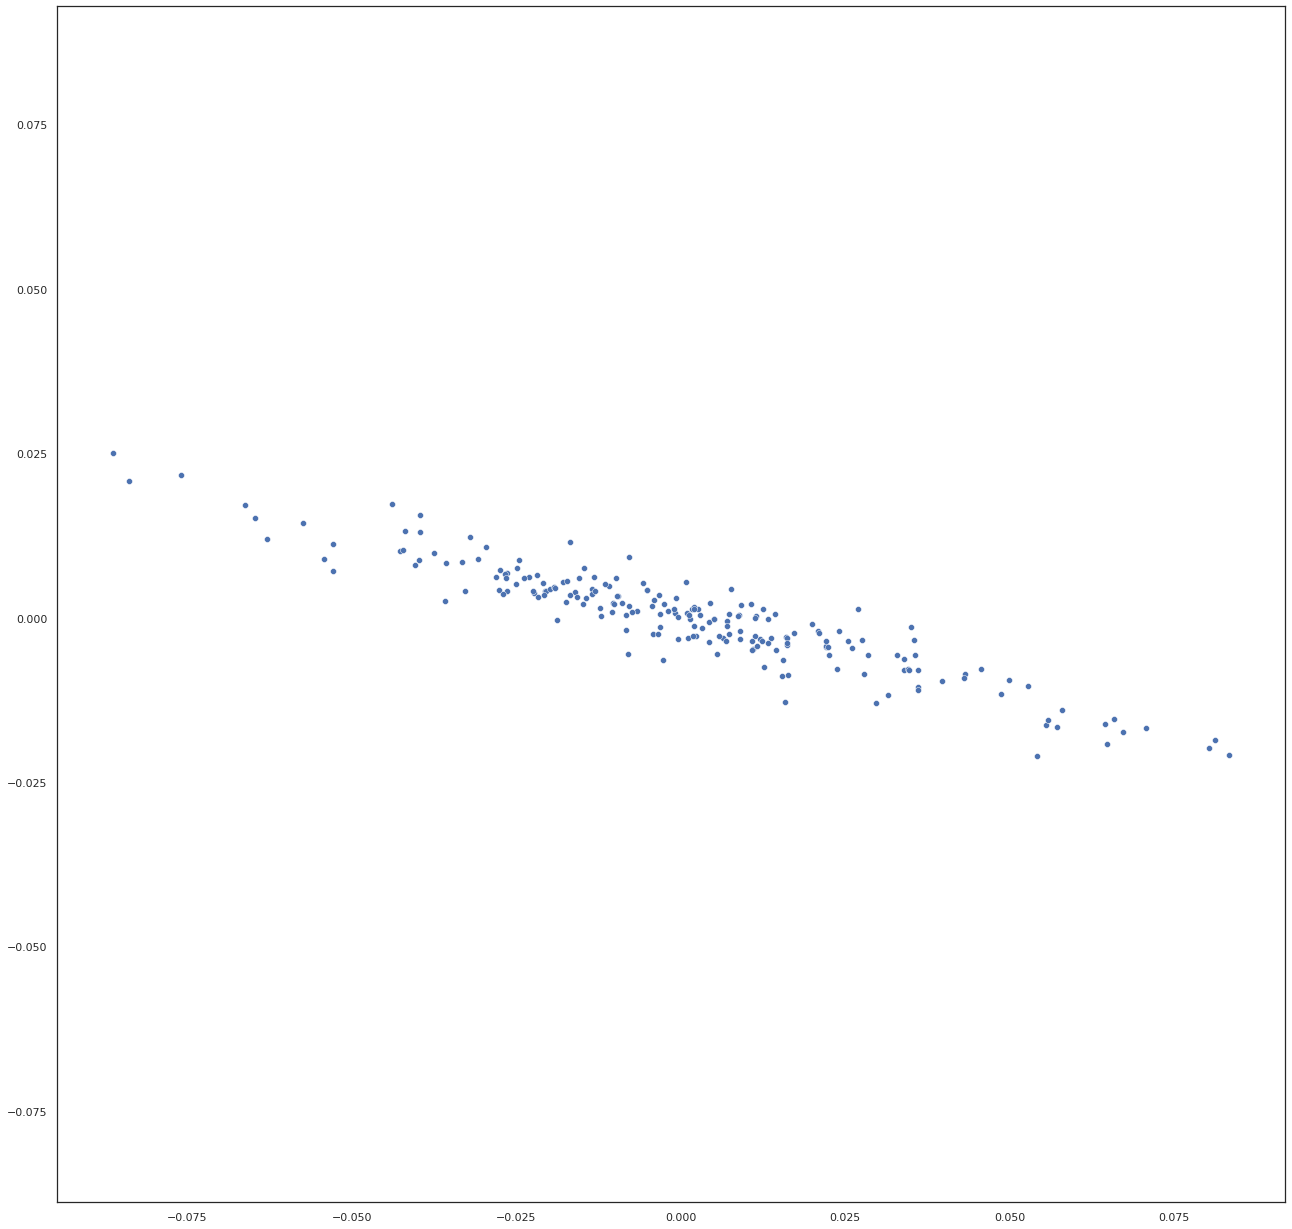

In [77]:
sns.scatterplot(x = bvals_all_pca[:, 0], y = bvals_all_pca[:, 1])
plt.axis('equal')

In [79]:
bvals_all_pca[:, 0].shape

(210,)

In [458]:
tabular_tfmri.loc[tabular_tfmri['sleep_quality_quantiles'] == tabular_tfmri['sleep_quality_quantiles'].cat.categories[0]].shape

(6508, 286)

In [463]:
collect_functional_connectivity_relation_bi_interaction(tabular_tfmri.loc[tabular_tfmri['sleep_quality_quantiles'] == tabular_tfmri['sleep_quality_quantiles'].cat.categories[0]],
                                                                       ['Daytime_dozing___sleeping_narcolepsy', 'phq2'])

(array([2.88287717e-01, 9.99537408e-01, 5.03944434e-01, 8.51598411e-01,
        1.30314311e-03, 8.95270477e-01, 6.06320933e-02, 5.87703480e-01,
        2.13024928e-03, 5.01368594e-01, 5.19634696e-01, 5.47408358e-01,
        2.12230420e-01, 9.20409817e-01, 7.86814916e-01, 8.89456619e-02,
        1.06506081e-01, 8.14499368e-01, 2.78310126e-01, 2.35471773e-01,
        1.10507786e-01, 4.00917860e-01, 6.75479017e-01, 6.52975428e-02,
        1.53014258e-01, 2.02734620e-01, 8.61506817e-01, 9.81576713e-01,
        3.57559837e-06, 3.31875810e-01, 6.22390093e-01, 1.96510145e-03,
        6.84880738e-01, 3.24634067e-01, 2.27621320e-02, 3.20358313e-01,
        7.15485616e-02, 4.08516712e-03, 8.56355594e-02, 6.70846163e-02,
        6.72982268e-01, 9.33099602e-01, 9.74162107e-01, 9.16896701e-02,
        1.44228271e-06, 2.07428805e-01, 4.10708795e-01, 3.26562595e-01,
        2.95284739e-01, 3.98430096e-01, 3.38816075e-02, 6.53944035e-01,
        8.23209330e-04, 3.85337913e-02, 3.51607179e-06, 7.793001

In [464]:
collect_functional_connectivity_relation_bi_interaction(tabular_tfmri.loc[tabular_tfmri['sleep_quality_quantiles'] == tabular_tfmri['sleep_quality_quantiles'].cat.categories[1]],
                                                                       ['Daytime_dozing___sleeping_narcolepsy', 'phq2'])

(array([8.00526137e-01, 1.18102533e-01, 8.06886530e-01, 3.82237134e-01,
        7.19688763e-03, 9.22270571e-01, 2.64239236e-01, 1.14504211e-01,
        8.52540284e-01, 2.31215387e-01, 2.37780955e-01, 3.95906712e-03,
        2.73641119e-01, 8.50053094e-01, 1.62341085e-01, 3.30177059e-01,
        3.08289802e-01, 7.71690880e-01, 3.03425134e-01, 1.02052696e-02,
        1.03941045e-01, 1.19399925e-02, 8.46410690e-01, 8.97139795e-01,
        2.69818994e-02, 5.80592376e-01, 9.33061018e-02, 3.46035912e-01,
        7.57755863e-06, 6.06172356e-01, 8.50289113e-01, 4.44128552e-01,
        7.79875267e-01, 6.76841680e-01, 5.80597764e-01, 8.06456589e-01,
        4.72549677e-01, 1.28971862e-04, 1.21808405e-02, 1.42487114e-02,
        4.36147543e-01, 6.93266874e-01, 1.76568881e-02, 9.58909568e-02,
        9.53651745e-08, 6.33314170e-03, 1.80918854e-01, 2.05786215e-01,
        6.50741407e-01, 4.35899871e-01, 3.82282178e-01, 3.43537452e-03,
        6.27051190e-01, 7.42567408e-04, 3.04949389e-09, 8.813895

In [89]:
# bvals_all_pca[:, 0]
square_net_bval = np.zeros((21,21))
square_net_bval[np.triu(np.ones((21,21)),1)>0] = bvals_all_pca[:, 0]
square_net_bval = square_net_bval + square_net_bval.T
N = 21  # Number of nodes
node_names = [f"IC{i}" for i in range(N)]  # List of labels [N]
node_names = np.array(node_names)[ica2yeo7['ICA_d25_ID'].values.astype(int)]
square_net_bval_rearranged = square_net_bval[ica2yeo7['ICA_d25_ID'].values, :][:, ica2yeo7['ICA_d25_ID'].values]
con_vals = np.where(np.abs(square_net_bval_rearranged) > 0.05, square_net_bval_rearranged, np.nan)  # NaN so it doesn't display the weak links
    

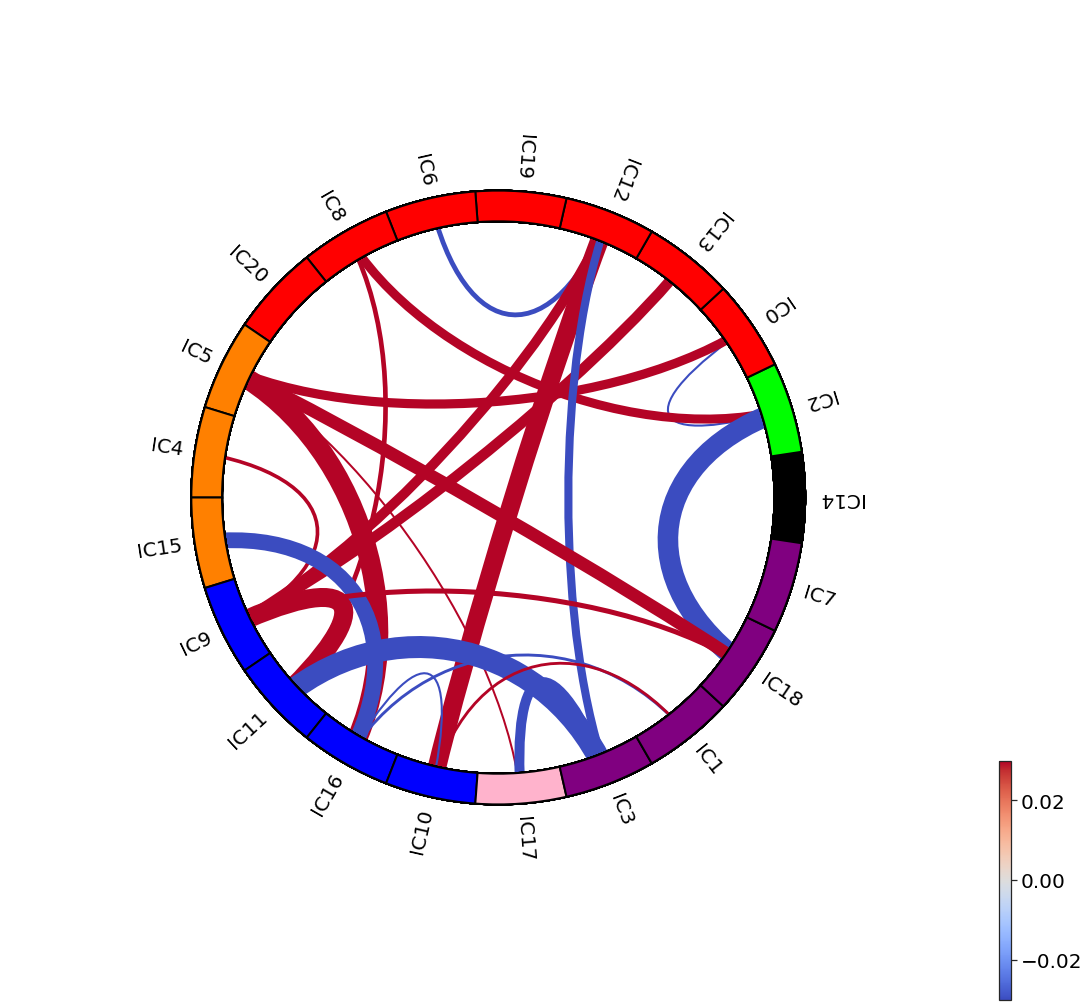

In [90]:
from matplotlib import cm
meta = dict()
meta['node_colors'] = node_colors
meta['facecolor'] = 'white'
meta['textcolor'] = 'black'
meta['fontsize_names'] = 20
meta['vmin'] = -0.03
meta['vmax'] = 0.03
meta['colormap'] = cm.coolwarm
meta['fontsize_colorbar'] = 20

plot_handle = plot_connectivity_circle_width(con_vals, node_names, meta=meta)


In [160]:
tabular_tfmri['depressed'].value_counts()

False    29918
True       944
Name: depressed, dtype: int64

In [25]:
pvals_all.loc[pvals_all['Sleep_duration'] < 0.01]

,Sleep_duration,duration_of_longest_sleep_bout,phq2,cognition,sleep_sefrep,daytime_dozing
1,9.462668e-04,8.115285e-01,0.071102,0.000538,0.000098,1.475034e-02
4,1.403782e-04,4.561968e-02,0.394060,0.135299,0.007072,4.707515e-05
10,5.142721e-05,4.027409e-01,0.000803,0.570352,0.419043,1.807332e-01
13,5.027538e-06,7.717871e-01,0.000125,0.165568,0.292213,7.942319e-03
15,4.338374e-03,8.524370e-02,0.078658,0.267992,0.005121,2.315300e-01
...,...,...,...,...,...,...
203,1.445201e-04,1.259199e-07,0.368541,0.000005,0.966575,1.074525e-06
204,3.902931e-05,1.741082e-02,0.000627,0.147817,0.000240,1.338966e-05
206,1.715120e-04,1.233479e-03,0.345910,0.657290,0.075472,8.030482e-07
207,5.736760e-11,1.086386e-03,0.827634,0.438954,0.140766,5.315394e-10


In [33]:
np.abs(bvals_all['duration_of_longest_sleep_bout']).argmax()

102

In [29]:
pvals_all.iloc[bvals_all['duration_of_longest_sleep_bout'].argmax(), :]

Sleep_duration                    1.156983e-46
duration_of_longest_sleep_bout    7.704035e-16
phq2                              4.328707e-03
cognition                         3.031499e-02
sleep_sefrep                      3.678163e-04
daytime_dozing                    4.989364e-47
Name: 102, dtype: float64

In [30]:
pvals_all['duration_of_longest_sleep_bout'].argmin()

102

In [34]:
np.abs(bvals_all['daytime_dozing']).argmax()

102

In [36]:
bvals_all.iloc[np.abs(bvals_all['daytime_dozing']).argmax(), :]

Sleep_duration                    0.335177
duration_of_longest_sleep_bout    0.197225
phq2                              0.077426
cognition                        -0.013970
sleep_sefrep                      0.119271
daytime_dozing                   -0.723912
Name: 102, dtype: float64

In [ ]:
variables_presentable = ['Duration of longest sleep bout', 'PHQ-2', 'Cognition', 'Self-report insomnia', 'Self-report daytime dozing']
assoc_stats_df = pd.DataFrame(columns=['Variable', 'Node 1', 'Node 2', 'Coefficient', 't-value', 'p-value (raw)', 'p-value (Bonferroni)', 'Significant'],
                                 index=np.arange(16110 * 5))
for idx, var in enumerate(bvals_all.columns):
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'Variable'] = variables_presentable[idx]
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'Node 1'] = np.triu_indices(180, 1)[0]
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'Node 2'] = np.triu_indices(180, 1)[1]
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'Coefficient'] = bvals_all[var][np.triu_indices(180, 1)]
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 't-value'] = tvals_all[var].values
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'p-value (raw)'] = pvals_all[var].values
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'p-value (Bonferroni)'] = pvals_all[var].values * 21 * 5
    assoc_stats_df.loc[idx*16110:(idx+1)*16110-1, 'Significant'] = pvals_all[var].values * 5 < 0.05
assoc_stats_df.to_csv('./stats_supplement/seed_based_correlation_association_statistics.csv'.format(var), index=False)



In [37]:
bvals_all

,Sleep_duration,duration_of_longest_sleep_bout,phq2,cognition,sleep_sefrep,daytime_dozing
0,-0.017187,-0.006724,0.007968,0.009155,-0.049508,0.102718
1,-0.039764,0.002969,-0.025134,0.011443,-0.067061,0.063283
2,0.015811,0.006316,0.008909,-0.006255,0.025184,-0.010004
3,0.022234,-0.007948,0.014942,0.001255,0.000295,0.007570
4,0.070394,0.038391,0.018265,0.007640,0.071175,-0.161395
...,...,...,...,...,...,...
205,-0.018776,-0.020636,-0.043782,0.008001,-0.053223,0.094865
206,0.049924,0.044963,0.014472,0.001621,0.033774,-0.141174
207,-0.084524,-0.043731,0.003254,0.002781,-0.027194,0.172848
208,-0.011289,-0.024886,-0.039652,0.000029,-0.022846,0.044226
